# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING







##### **Project Type**    - Unsupervised
##### **Contribution**-    Team
##### **Team Member 1 -** AMITHA K

##### **Team Member 2 -**APOORVA VISHWAKARMA

##### **Team Member 3 -**ABHISHEK P SADAWARTE

##### **Team Member 4 -**MOHD KHALID
##### **Team Member 5 -**SHASHANK KUMAR YADAV

# **Project Summary -**

Netflix, is an American subscription streaming service and production company. It was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California.

It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals.

Our objective is to do the analysis on Netflix data using Unsupervised Machine learning Algorithms  like applying different clustering methods to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

After loading the data, we start by observing the first and last five values to understand the dataset. Next, we treat the null values by dropping them if the respective variables contain <1% of null values. This is followed by feature engineering to extract new variables from the datetime variable date_added.

This cleaned data is then used to conduct EDA in order to understand it better and identify the underlying trends. After EDA we visualize through plotting charts and observe meaningful insights from these charts.

Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.
Then, Dimensionality Reduction can be applied using (PCA) Principal Component Analysis and Data Scaling using Standard Scaling technique or minmax scaling.

Finally, K–Means clustering is utilized to form 10 distinct clusters with similar data points.Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The Elbow Curve is one of the most popular methods to determine this optimal value of k.

And after this hierarchical and agglomerative clustering  is done on the cleaned data and dendrogram will be plotted.



# **GitHub Link -**

https://github.com/j0kr97/Netflix_shows_clustering_recommender

# **Problem Statement**




This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
In this project, I have done

 1.Exploratory Data Analysis

 2.Understanding what type content is available in different countries

 3.Is Netflix increasingly focusing on TV rather than movies in recent years.
 
 4.Clustering similar content by matching text-based features**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import datetime as dt

%matplotlib inline


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset 
netflix = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df = netflix.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Check for null values.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


Insights
* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

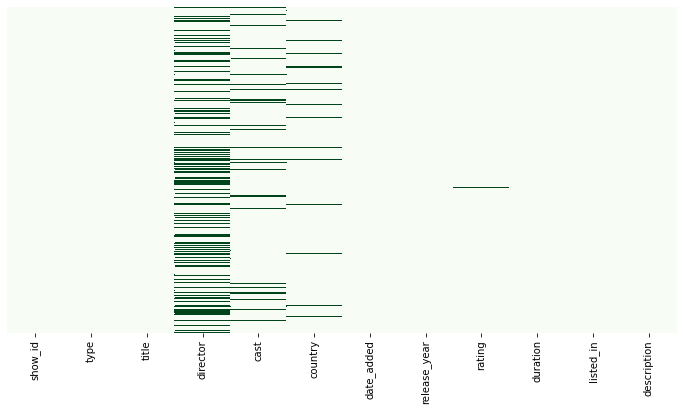

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

In [ ]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)
     

### What did you know about your dataset?

Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.Answer Here

We have 5 columns with missing values.

* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.
* The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* There is a total of 7787 movies / TV shows and 12 columns present in this data set collected from AlmaBetter
* Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.
* There are missing values present in director, cast and country columns.We need to remove those missing values by filling NAN values.
* There is no duplicate values present in the dataset. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,7787,4050,unknown,2389
cast,7787,6832,unknown,718
country,7787,682,United States,2555
date_added,7787,1566,"January 1, 2020",118
rating,7787,15,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


### Variables Description 


The dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Release Year of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genre

* description: The Summary description


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64

Insights

* Firstly checked all unique values and observe all unique values in the dataset.
* Checking all the columns present in the dataset and observe that almost all the columns have textual data and having different catrgories of the data.
* Using describe we have seen that maximum value and minimum value and observe that we have only rating as a numerical value in the dataset.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking list of top countries
df.country.value_counts()

United States                                                   2555
India                                                            923
unknown                                                          507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
# Checking list of Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

Insights
* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [ ]:
# Write your code to make your dataset analysis ready.
# CONVERTING 'date_added' to datetime format
def date(row):
  a = row['date_added']
  if 'unknown'  not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df['date_added'] = df.apply(lambda x: date(x), axis=1)

#### Feature Engineering - listed_in


Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

In [ ]:
# Creating copy of the dataset 
a = df.copy()

In [ ]:
# Observinf all the unique values of the feature genre - listed_in
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
# Replacing the generalize genre in the datatset 
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
# Creating function for replacing the genre in the original dataset
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))
     

In [ ]:
# Checking unique and generalized genre
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

### What all manipulations have you done and insights you found?

Firstly converted date added to date time format beacuse it is necessary to extract date, month , year from the dataset to observe differnt trends.

Feature engineering will be required for listed_in feature as it is genre column.Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

The data set now is super huge. I have tried many different ways but can't get the Kernel running as intended without memory error. Therefore I tried to reduce the data volumn by improving the data quality below:

Remove movie with too less reviews (they are relatively not popular)
Remove customer who give too less reviews (they are relatively less active)
Having above benchmark will have significant improvement on efficiency, since those unpopular movies and non-active customers still occupy same volumn as those popular movies and active customers in the view of matrix (NaN still occupy space). This should help improve the statistical signifiance too.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Histogram plot of release dates of shows/movies on Netflix

<Figure size 1008x576 with 0 Axes>

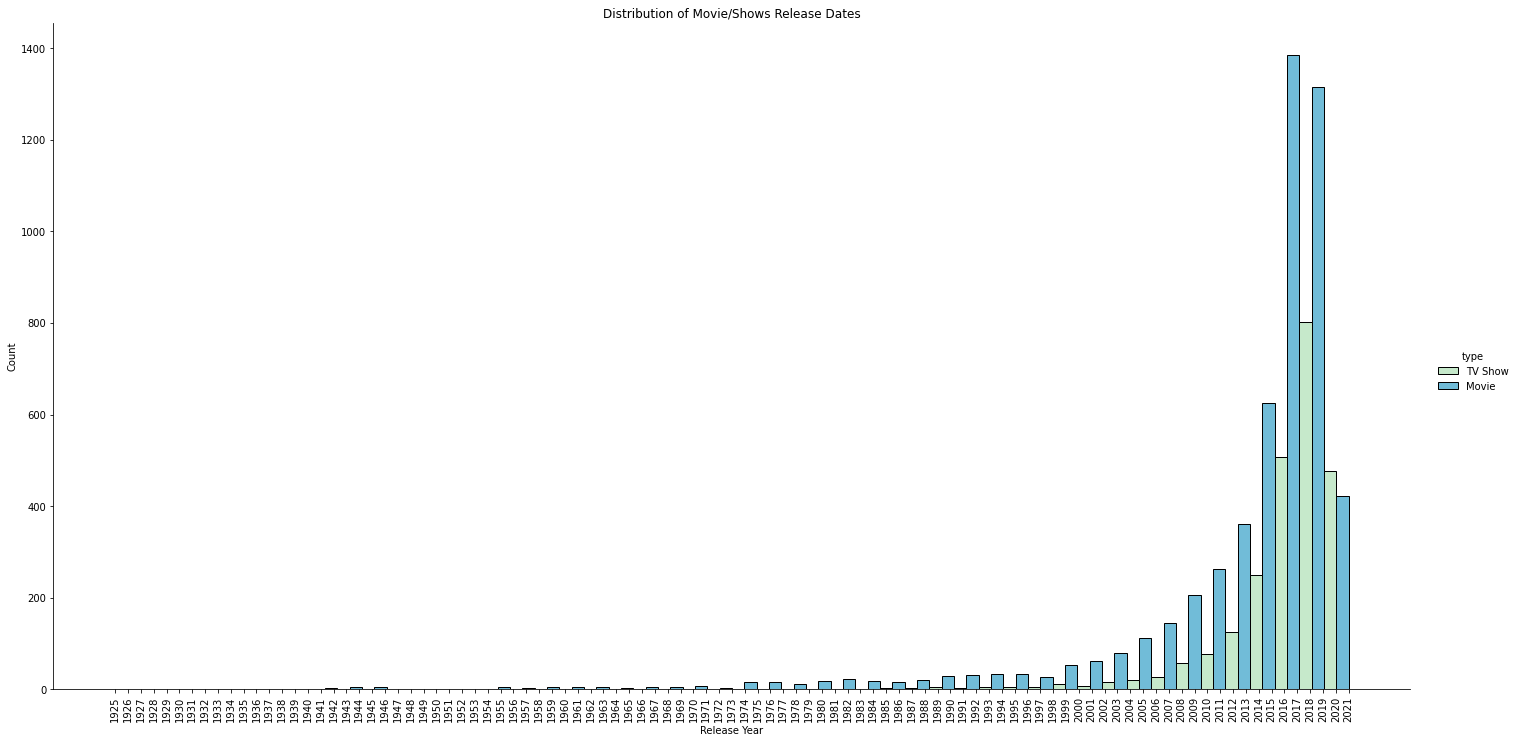

In [ ]:
# Chart - 1 visualization code
#Histogram plot of release dates of shows/movies on Netflix
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Most Movies streaming on the platform were released after 2010
Most TV Shows streaming on the platform were released after 2015
The year 2017 had highest number of Movie and TV show releases on the platform.Based on the timeline above, we can conclude that the popular streaming platform started gaining traction after 2013. Since then, the amount of content added has been increasing significantly. The growth in the number of movies on Netflix is much higher than that on TV shows. About 1,300 new movies were added in both 2018 and 2019. Besides, we can know that Netflix has increasingly focused on movies rather than TV shows in recent years

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the histogram plot we can see that the number of movies and tv shows are increasing in netflix platform and there is increasing trend during pandemic times.

#### Chart - 2 - Histogram plot of dates of number of shows/movies added by the Streaming giant

<Figure size 1008x576 with 0 Axes>

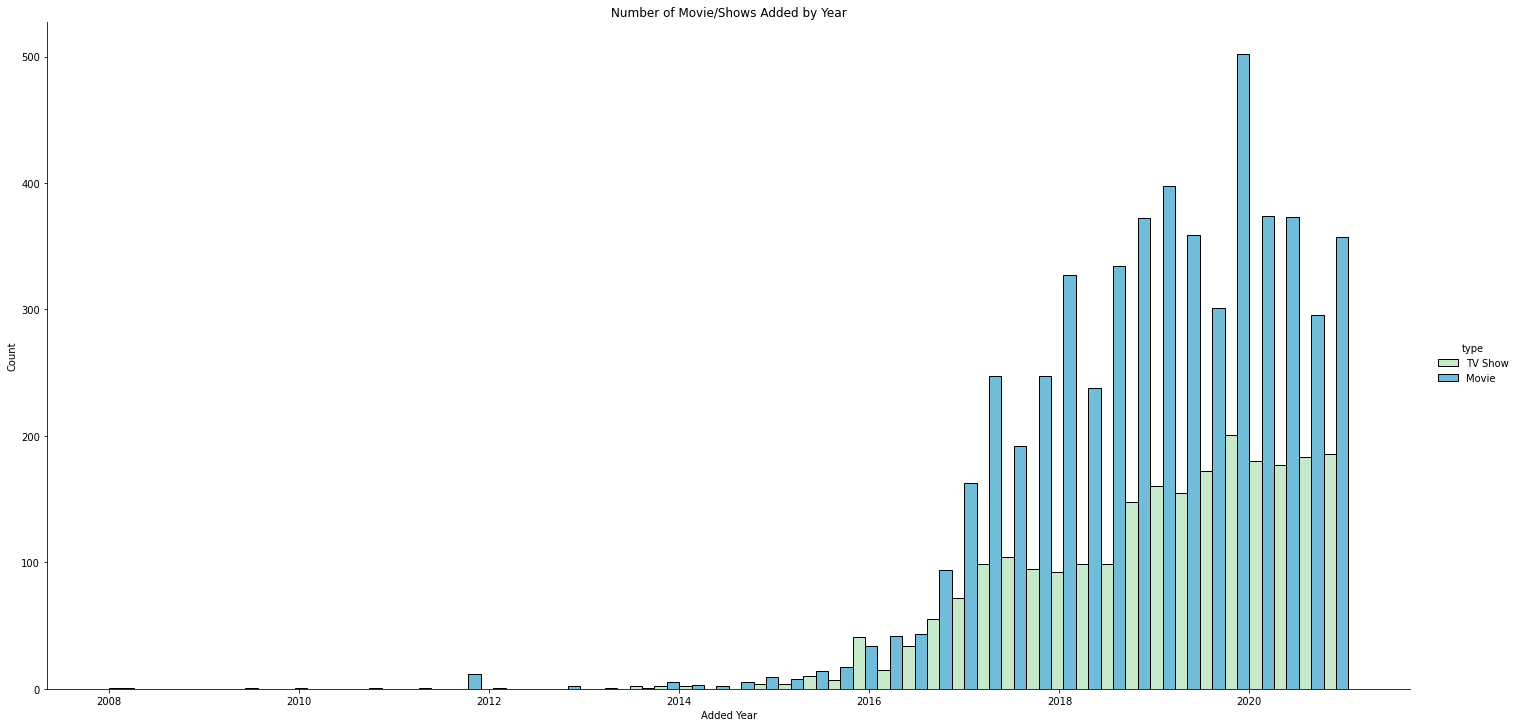

In [ ]:
# Chart - 2 visualization code
#Histogram plot of dates of number of shows/movies added by the Streaming giant
a = plt.figure(figsize=(14,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

##### 1. Why did you pick the specific chart?

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

Netflix began adding videos to the platform from 2008 The streaming giant started aggressively adding movies and TV shows from 2017 More movies are added as compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that tv series are increasing trend as compared to movies , which are in reducing trend.

#### Chart - 3- Type of Videos on Netflix

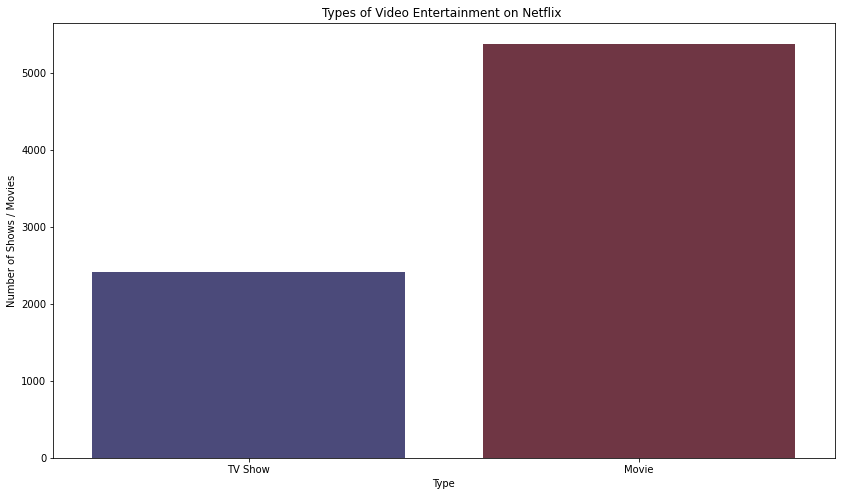

In [ ]:
# Chart - 3 visualization code
#Type of Videos on Netflix
a = plt.figure(figsize=(14,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

##### 1. Why did you pick the specific chart?

A count plot Show the counts of observations in each categorical bin using bars.A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

##### 2. What is/are the insight(s) found from the chart?

Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.Show the counts of observations in each categorical bin using bars.There are almost twice as many movies as TV shows on Netflix. Audience like movie cintent more as compared to tv shows . As of now netflix attarcts audience more. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So there are about 4,000++ movies and almost 2,000 TV shows, with movies being the majority. There are far more movie titles (68,5%) that TV shows titles (31,5%) in terms of title.we can see that netflix is focusing more on movies as compared to the tv series and in future also this trend might continue.

#### Chart - 4 - Different Ratings on the Platform

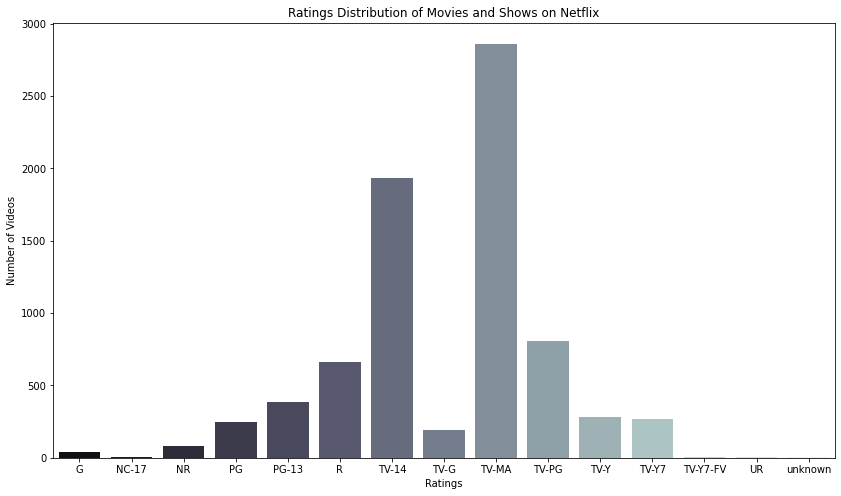

In [ ]:
# Chart - 4 visualization code
#Different Ratings on the Platform
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

##### 2. What is/are the insight(s) found from the chart?

* Most content on Netflix is rated for Mature Audiences and over 14 years old.
* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix is targeting the older people as compared to the younger generation.
Netflix should try to focus more on younger audiances.For example: Netflix try to publishe movies for kids and for younger audience like animated webseries or movies which can enjoyed by younger audience more.

#### Chart - 5 - Top 10 Countries that produced content on Netflix

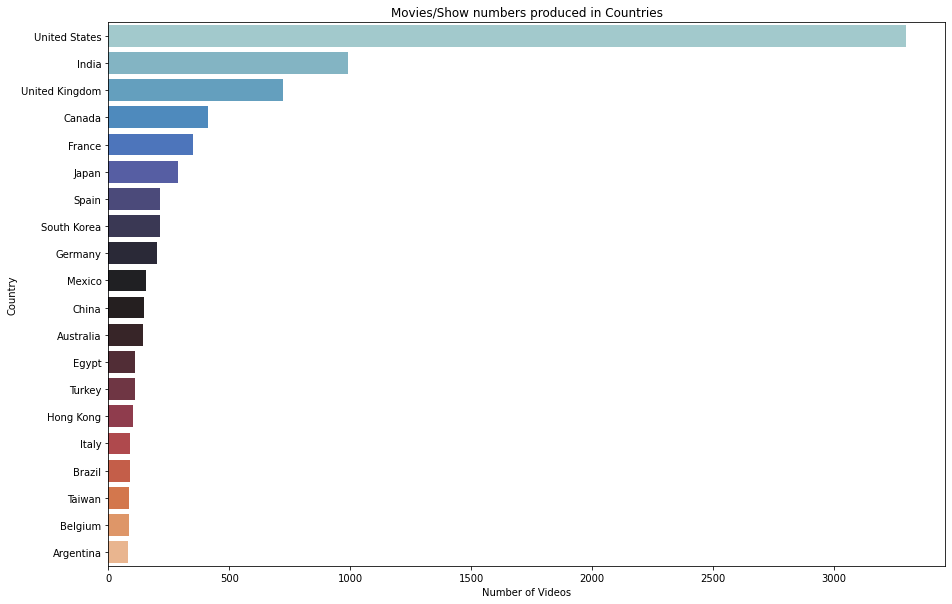

In [ ]:
# Chart - 5 visualization code
#Top 10 Countries that produced content on Netflix
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars it can be used to compare different values.A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

The majority of the content providers are in the above top-ten countries.
Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.

Top Countries in Netflix are:

1. United States
2. .India 
3. United Kingdom 
4. Canada 
5. France


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of videos are produced in usa and then india so netflix should try to target other regions too.In my opinion netflix will understand different countries content liking and based on that make movies based on that.

#### Chart - 6 - Top Genres on Netflix

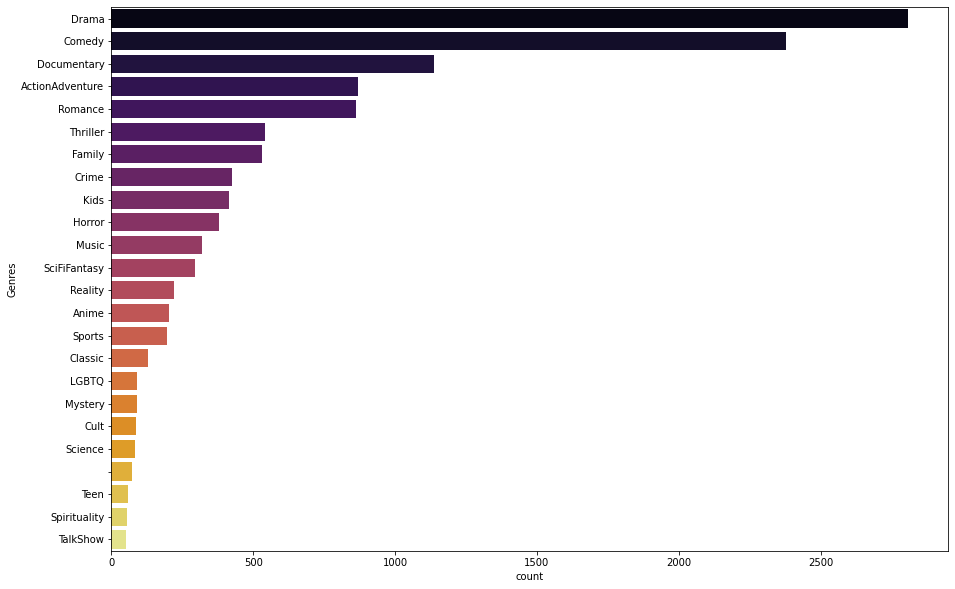

In [ ]:
# Chart - 6 visualization code
#Top Genres on Netflix
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars and we wanted to know which genre is most in demand so its best to show it.A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.
The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

Top Genres in Netflix are:

1. Drama
2. Comedy 
3. Documentary  
4. Action and Adventure  
5. Romance

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix should need to target other genres too so as to get high viewership and get wide range of audiances. 

#### Chart -7 - Frequent Directors on Netflix

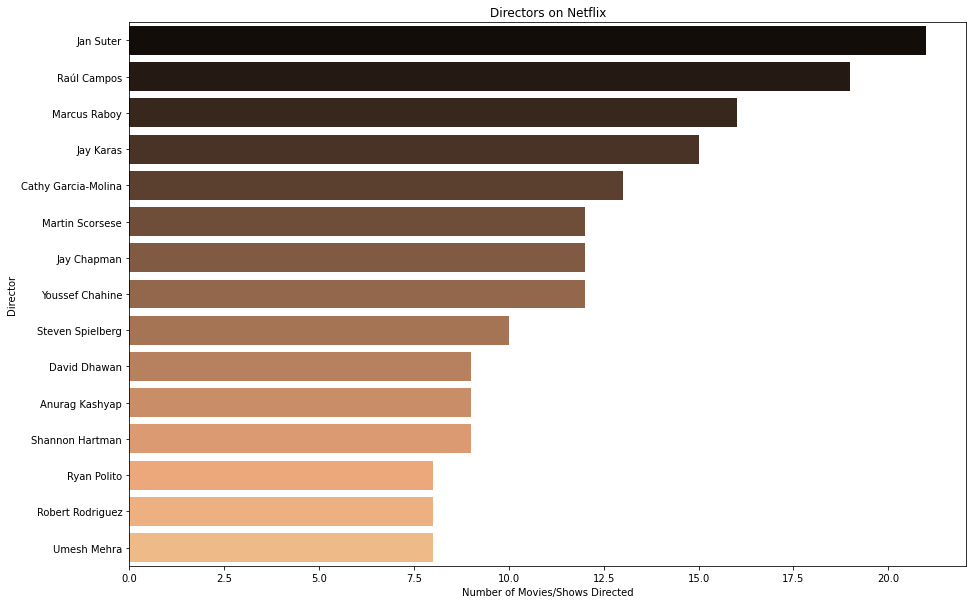

In [ ]:
# Chart - 7 visualization code
#Frequent Directors on Netflix
a=df[df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(15)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'copper')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10directors = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(10)['Director'].to_list()

##### 1. Why did you pick the specific chart?

To know which diretor is frequently directed a movie or a series or most successful director we used bar plot.A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars and we wanted to know which genre is most in demand so its best to show it.A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

Top Directors on Netflix are:

1. Jan Suter
2. Raul Campos 
3. Marcus Raboy 
4. Jay Karas  
5. Cathy Garcia-Molina

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Jan Suter is most common director in netflix so he might be highly loved by the audiences, he and other top directors need to be utilised for further movies in future.

#### Chart - 8 - Frequent Cast on Netflix

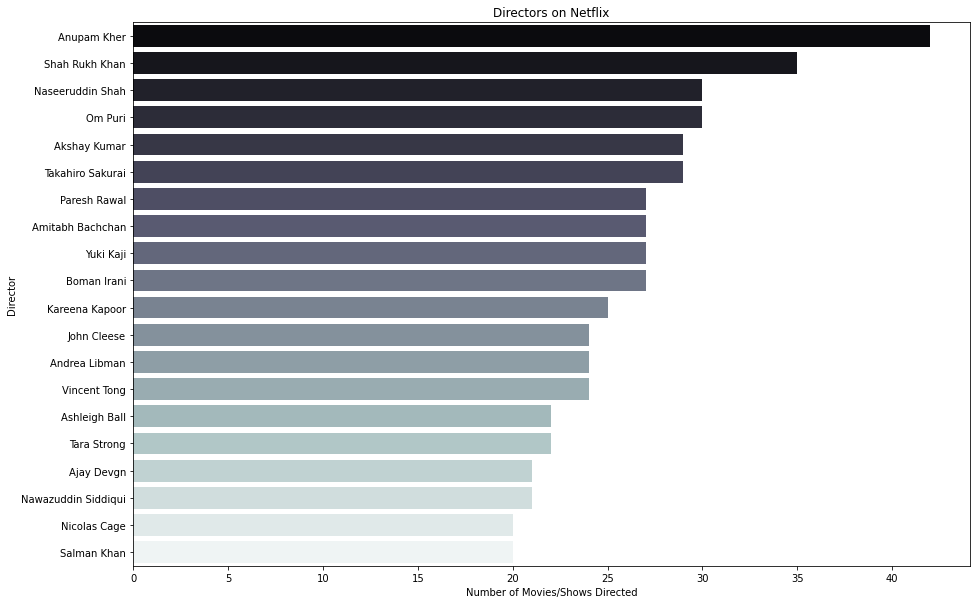

In [ ]:
# Chart - 8 visualization code
#Frequent Cast on Netflix
a=df[df.cast != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'id',data = a , palette= 'bone')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10actors = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()['Actor'].to_list()

##### 1. Why did you pick the specific chart?

To know which diretor is frequently directed a movie or a series or most successful director we used bar plot.A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars and we wanted to know which genre is most in demand so its best to show it.A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

Top Actors on Netflix are:

1. Anupam Kher
2. Shah Rukh Khan 
3. Naseeruddin Shah 
4. Om Puri 
5. Akshay Kumar

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indian actors like anupam kher , shahruk khan and other are frequently used in movies so that means people like them a lot and their movies and tv shows need to be promoted.

#### Chart - 9 - Duration of Movies on Netflix

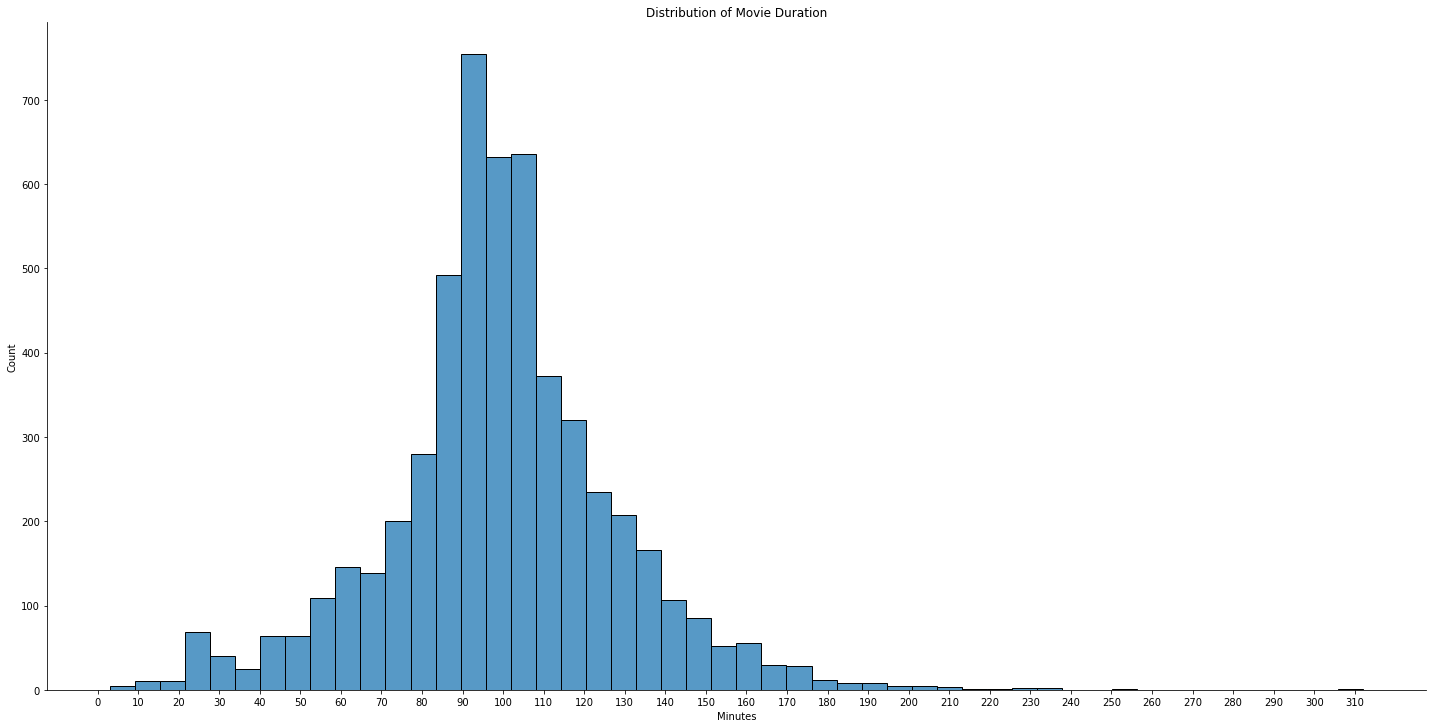

In [ ]:
# Chart - 9 visualization code
#Duration of Movies on Netflix
a=df[df['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))

##### 1. Why did you pick the specific chart?

Bar plot is used to know the time duration of each movies in netflix. A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars and we wanted to know which genre is most in demand so its best to show it.A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

Most movies on Netflix have a duration range from 90 to 110 minutes

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the movies in netflix is around 1 hour and 30mins long approx ,  so people dont like long movies .

#### Chart - 10 - Duration of TV shows on Netflix

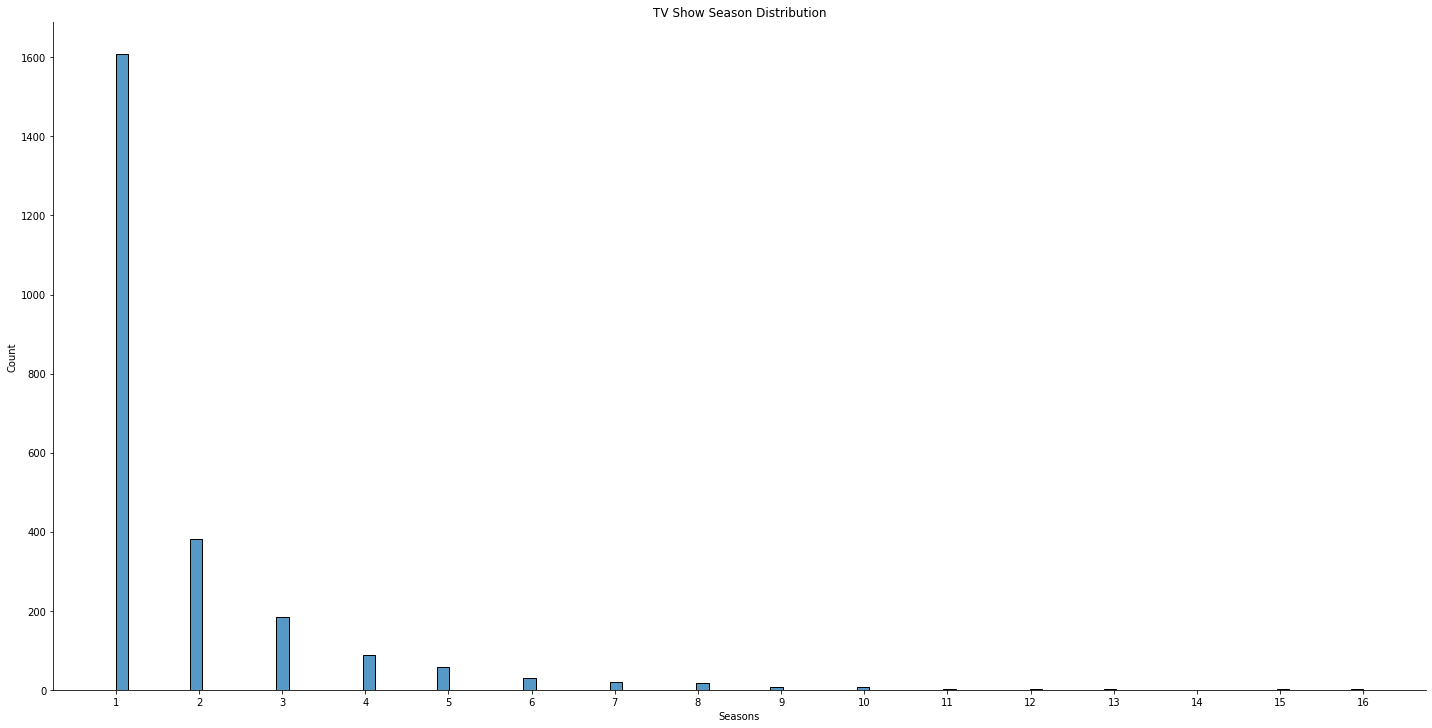

In [ ]:
# Chart - 10 visualization code
#Duration of TV shows on Netflix
a=df[df['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=10, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

##### 1. Why did you pick the specific chart?

Bar plot is used to depict the number of seasons in each series.Bar plot is used to know the time duration of each movies in netflix. A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars and we wanted to know which genre is most in demand so its best to show it.A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action

##### 2. What is/are the insight(s) found from the chart?

Most TV shows on Netflix have a span of 1 season only.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most tv shows in netflix is just 1 season long , so people mostly like small series.

#### Chart - 11 -  Has Netflix been focusing increasingly on TV shows as compared to movies

In [ ]:
#Has Netflix Been Focusing Increasingly on TV Shows as compared to movies
content = df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [ ]:
# Extract year from the date added from date column
content['date_added'] = content['date_added'].dt.year

In [ ]:
#Assuming TV shows release new seasons every year, we'll be adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])      
  
  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [ ]:
# comparing values present in released year
compare = content.explode('Released Years')

In [ ]:
# Observing tv shows and movies differently
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [ ]:
# Concate 2 dataset tv shows ans movies
data = pd.concat([tv, movie], axis = 0)

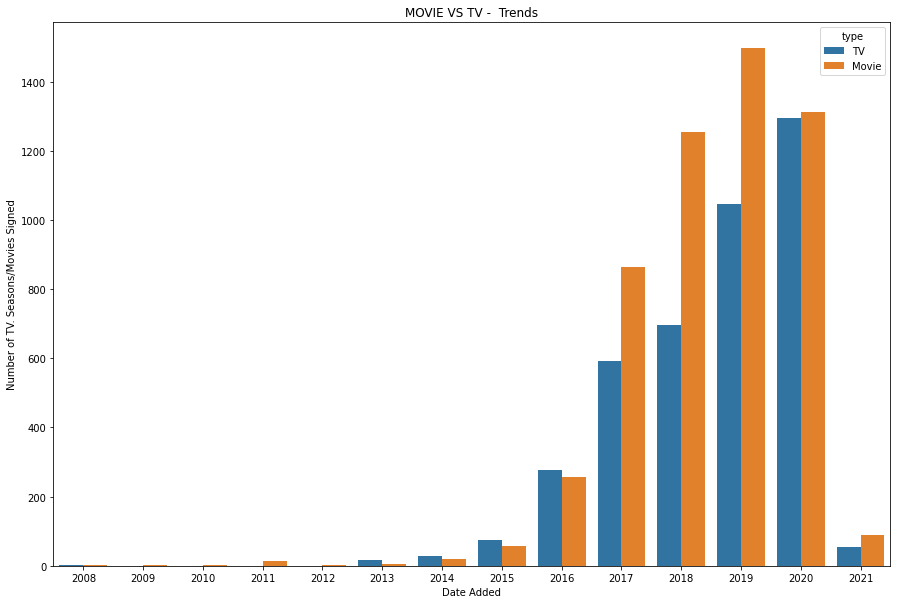

In [ ]:
# plotting the tv shows and movies year wise
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

##### 1. Why did you pick the specific chart?

Bar plot is used to compare number of movies and tv shows signed.A multiple bar chart is also called a Grouped Bar chart. A Bar plot or a Bar Chart has many customizations such as Multiple bar plots, stacked bar plots, horizontal bar charts. Multiple bar charts are generally used for comparing different entities

##### 2. What is/are the insight(s) found from the chart?

The above graph depicts seasons of TV shows signed vs the movies signed This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

number of tv shows and movies signed are at par with each other since past few years.

#### Chart - 12 - Tv shows vs movies release year

In [ ]:
# Chart - 12 visualization code
# Tv shows vs movies release year
tv = compare[compare['type'] == 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'
     

In [ ]:
# Concatenating the tv shows and movies from thr dataset
data = pd.concat([tv, movie], axis = 0)

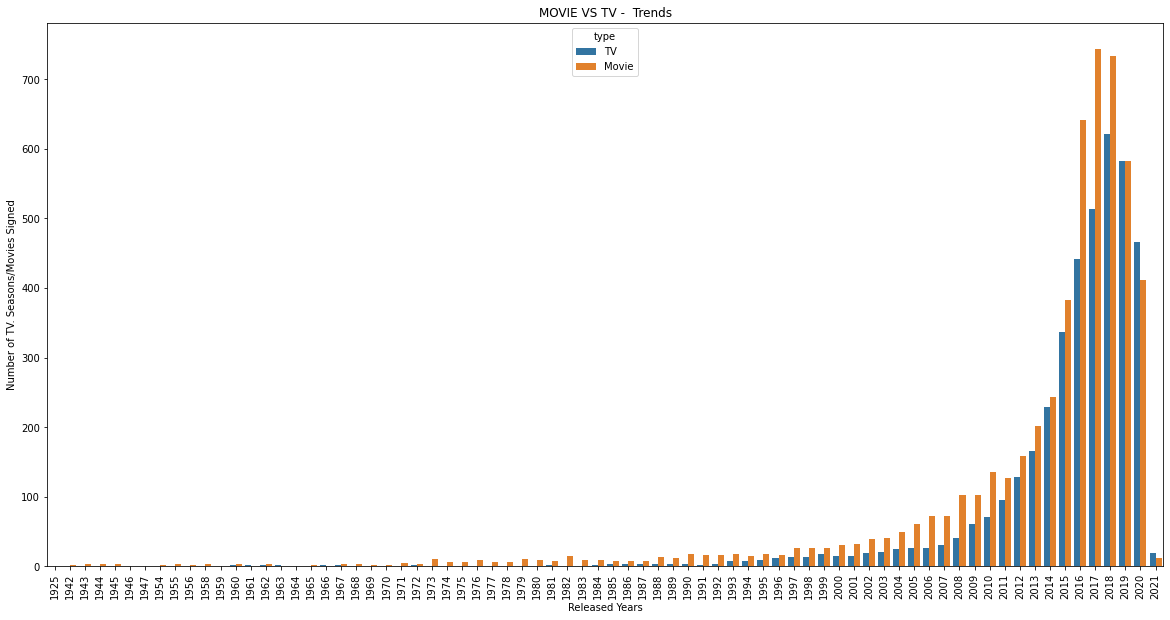

In [ ]:
# Plotting graph of movies verse tv shows trends
plt.figure(figsize = (20,10))
sns.barplot(x = 'Released Years', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Released Years')
plt.xticks(rotation = 90)
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

##### 1. Why did you pick the specific chart?

Bar plot is used to show comparison between tv shows and movies realease year.A multiple bar chart is also called a Grouped Bar chart. A Bar plot or a Bar Chart has many customizations such as Multiple bar plots, stacked bar plots, horizontal bar charts. Multiple bar charts are generally used for comparing different entities

##### 2. What is/are the insight(s) found from the chart?

The above graph depicts an estimation of seasonal TV show and Movie release date per each year. We make a general assumption that each show releases a season yearly which is often the case for most TV shows. There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022. [ P.S: Brilliant slow burn. Do check it out! ] We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010 Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is high trend of tv shows compared to movies.

#### Chart - 13 

In [ ]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.


##### 2. What is/are the insight(s) found from the chart?

Answer Here.
a

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


#### Chart - 14 - Correlation Heatmap

In [ ]:
# heatmap
# Not required beacuse all the features in the dataset are categorical value or textual data we have 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[ActionAdventure, SciFiFantasy]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,[Drama]


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', 'unknown'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama],Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror],Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[ActionAdventure, SciFiFantasy]",Teens


In [ ]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:

#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


<ipython-input-51-0e65087deef1>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M1 = A.mean()
<ipython-input-51-0e65087deef1>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  S1 = A.std()
<ipython-input-51-0e65087deef1>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M2= B.mean()
<ipython-input-51-0e65087deef1>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

In [ ]:

#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

T-values are a type of test statistic. Hypothesis tests use the test statistic that is calculated from your sample to compare your sample to the null hypothesis. If the test statistic is extreme enough, this indicates that your data are so incompatible with the null hypothesis that you can reject the null.

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[ActionAdventure, SciFiFantasy]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,[Drama]


In [ ]:
# Creating hypothesis dataset
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:
# Loading some feature to the hypothesis dataset
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror]


In [ ]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [ ]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


<ipython-input-59-0f10debe6e90>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M1 = A.mean()
<ipython-input-59-0f10debe6e90>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  S1 = A.std()
<ipython-input-59-0f10debe6e90>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M2= B.mean()
<ipython-input-59-0f10debe6e90>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

In [ ]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])
     

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

##### Which statistical test have you done to obtain P-Value?

T-values are a type of test statistic. Hypothesis tests use the test statistic that is calculated from your sample to compare your sample to the null hypothesis. If the test statistic is extreme enough, this indicates that your data are so incompatible with the null hypothesis that you can reject the null.

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation 
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

fillna() manages and let the user replace NaN values with some value of their own

### 2. Handling Outliers

In [ ]:
# Ouliers
# Not required

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#not required

#### What all categorical encoding techniques have you used & why did you use those techniques?

not needed

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

This process involves converting the 'Description' of the show/movie into a machine interprettable form. Here we convert all text to lower case, remove punctuations and remove irrelevant words (so that only words that provide context are retained). Here similar words are unified to save memory and processing time as well. Individual words and group of words (n grams) are also collected to extract context related details.

#### FEATURE ENGINEERING LISTED_IN

In [ ]:
# Creating copy of the dataset
a = df.copy()

In [ ]:
# Checking the unique values for the genre column
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
# Generalize the listed_in column which is genre
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
# DEfining function for the genralized genre
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))

In [ ]:
# Checking unique genre of the dataset
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [ ]:
# Checking all the generalized genre in the replaced dataset
df['Genres']

0                 [Drama, SciFiFantasy]
1                               [Drama]
2                              [Horror]
3       [ActionAdventure, SciFiFantasy]
4                               [Drama]
                     ...               
7782                            [Drama]
7783                     [Drama, Music]
7784               [Documentary, Music]
7785                          [Reality]
7786               [Documentary, Music]
Name: Genres, Length: 7787, dtype: object

#### COMBINING Top CAST, DIRECTOR and ListedIn into single text attributes

We are extracting non-plot related text details about the movie/show like lead actors, director, country and categories it is being listed in on the platform

In [ ]:
# COMBINING Top CAST, DIRECTOR and ListedIn into single text attributes
def combine(row):
  text = ' '.join(row['Genres']).lower()
  if row['cast'] != 'unknown':
    cast_list = [actor.replace(' ', '') for actor in row['cast'].split(', ')]
    if len(cast_list) < 5:
      text = text + ' ' + ' '.join(cast_list[:]).lower()
    else :
      text = text + ' ' + ' '.join(cast_list[:5]).lower()
  if row['director'] !='unknown':
    director_list = ' '.join([director.replace(' ', '') for director in row['director'].split(', ')])
    text = text + ' ' + director_list.lower()

  return text
df['Movie Deets'] = df.apply(lambda row: combine(row), axis = 1)

In [ ]:
# Checking the movie list from the dataset
df.head()['Movie Deets'].to_list()

['drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira',
 'drama demiánbichir héctorbonilla oscarserrano azaliaortiz octaviomichel jorgemichelgrau',
 'horror teddchan stellachung henleyhii lawrencekoh tommykuan gilbertchan',
 'actionadventure scififantasy elijahwood johnc.reilly jenniferconnelly christopherplummer crispinglover shaneacker',
 'drama jimsturgess kevinspacey katebosworth aaronyoo lizalapira robertluketic']

In [ ]:
#importing necessary libraries for text processing
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
# Loading necessary libraries for text processing
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
 # Loading necessary libraries for text processing
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Loading necessary libraries for text processing
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### WORD TOKENIZATION

Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [ ]:
# Importing string 
import string

In [ ]:
# Defining function for tokenizer
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  
  return tokens
df['Processed Description'] = df['description'].apply(tokenizer)
df['Processed Movie Deets'] = df['Movie Deets'].apply(tokenizer)

#### 1. Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
  tokens = text
  new_tok = []
  for i in tokens:
    word = i
    for punctuation in list(string.punctuation):
      word = word.replace(punctuation, ' ')
    if word.replace(' ','').isalnum():
      new_tok.append(word)

  return ' '.join(new_tok).split(' ')

df['Processed Description'] = df['Processed Description'].apply(lambda x : remove_punctuation(x, regular_punct))
df['Processed Movie Deets'] = df['Processed Movie Deets'].apply(lambda x : remove_punctuation(x, regular_punct))



#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
stop_words = set(stopwords.words('english')) 

def remove_stop(tokens, stopwords):
  return [t.lower() for t in tokens if t.lower() not in stopwords]


df['Processed Description'] = df['Processed Description'].apply(lambda x : remove_stop(x, stop_words))

a = df.copy() #will be used for wordcloud later on

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  
  return tokens
df['Processed Description'] = df['description'].apply(tokenizer)
df['Processed Movie Deets'] = df['Movie Deets'].apply(tokenizer)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
ps = PorterStemmer()

def stem_text(text):  
  stemmed = []
  for word in text:
    stemmed.append(ps.stem(word))
  return stemmed


df['Processed Description'] = df['Processed Description'] .apply(lambda x : stem_text(x))

In [ ]:
# Defining function joiner for the text list
def joiner(text_list):
  new = []
  for text in text_list:
    if text == ' ' or text == '' :
      pass
    else:
      new.append(text)
      
  return ' '.join(new)

df['Processed Description'] = df['Processed Description'] .apply(lambda x : joiner(x))
df['Processed Movie Deets'] = df['Processed Movie Deets'].apply(lambda x : joiner(x))

In [ ]:
# Checking the dataset head 
df.loc[:,['description','Processed Description','Movie Deets',	'Processed Movie Deets']].head(1).T

,0
description,In a future where the elite inhabit an island ...
Processed Description,in a futur where the elit inhabit an island pa...
Movie Deets,drama scififantasy joãomiguel biancacomparato ...
Processed Movie Deets,drama scififantasy joãomiguel biancacomparato ...


##### Which text normalization technique have you used and why?

We used stemming .

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Using count Vector for counting vector
count_vectorizer = CountVectorizer(min_df = 10,max_df=0.5)
count_description_vector = count_vectorizer.fit_transform(df['Processed Description'])

count_movie_vector = count_vectorizer.fit_transform(df['Processed Movie Deets'])

In [ ]:
# Checking the shape of the newly created dataset
count_description_vector.shape

(7787, 2227)

In [ ]:
# Applying principal component analysis 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pd.concat([pd.DataFrame(count_description_vector.todense()), pd.DataFrame(count_movie_vector.todense())],axis =1))

PCA()

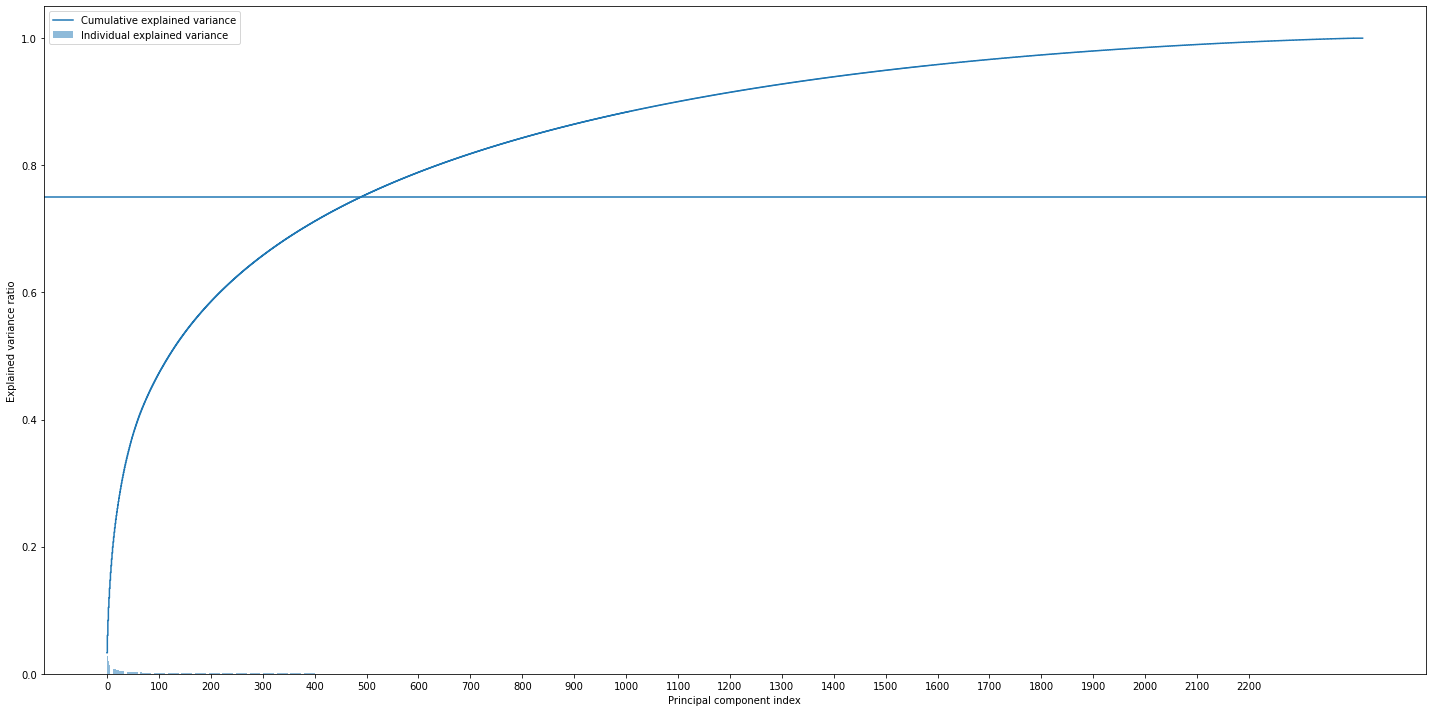

In [ ]:
# Loading PCA
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.figure(figsize = (20,10))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xticks(ticks = np.arange(0,2300,100))
plt.axhline(y=0.75)
plt.show()

##### Which text vectorization technique have you used and why?

Vectorising the preprocessed attributes Movie Dates and Description has sum total of 2126 + 192 = 2318 dimensions. These dimensions will have to be reduced using PCA, which would result in loss of information. Alternatively, the two attributes can be used to model the content into topics using Latent Dirichlet Allocation. This would makes sure that all the topical information about video content are captured without putting any available information to waste.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Preparing dataset for clustering

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
clustering_df = df[['type', 'duration','rating','release_year']]

Encoding TV and Movie ratings into one based on their age reccomendations

Guidelines:

Netflix: Maturity Rating Guidelines

In [ ]:
# Classify categories into generalized form from the dataset
def topick(row):
  older_kids = ['TV-PG', 'PG', 'TV-Y7', 'TV-Y7-FV']
  kids = ['TV-G', 'G', 'TV-Y']
  teens = ['PG-13','TV-14']
  adult = ['R', 'NC-17', 'TV-MA', 'UR', 'NR']

  rating = 'Others'
  for column in older_kids + kids + teens + adult:
    if row[column] == 1:
      if column in older_kids:
        rating = 'Older Kids'
      elif column in kids :
        rating = 'Kids'
      elif column in teens :
        rating = 'Teens'
      elif column in adult:
        rating = 'Adult'
      
  return rating

ratings = pd.get_dummies(clustering_df['rating']).drop('unknown',axis=1).apply(lambda x: topick(x),axis=1)
     

In [ ]:
# Concate the type and rating into clustering dataframe
clustering_df = pd.concat([clustering_df.drop(['type','rating'],axis =1),pd.get_dummies(ratings).drop('Others', axis=1), pd.get_dummies(clustering_df['type'])], axis =1)

In [ ]:
# Checking the clustering dataset
clustering_df

,duration,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show
0,4 Seasons,2020,1,0,0,0,0,1
1,93 min,2016,1,0,0,0,1,0
2,78 min,2011,1,0,0,0,1,0
3,80 min,2009,0,0,0,1,1,0
4,123 min,2008,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
7782,99 min,2005,1,0,0,0,1,0
7783,111 min,2015,0,0,0,1,1,0
7784,44 min,2019,1,0,0,0,1,0
7785,1 Season,2019,0,0,1,0,0,1


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#ENCODING TYPE, RATING
#PROCESSING MOVIE DURATION
#Extracting season numbers and movie duration as separate columns
def duration(row,column):
  text = row['duration'].split()
  if column == 'show':
    if row['Movie'] == 0:
      return int(text[0])
    else:
      return 0
  if column == 'movie':
    if row['Movie'] ==1:
      return int(text[0])
    else:
      return 0
clustering_df['show_duration'] = clustering_df.apply(lambda x: duration(x,'show'),axis =1)

clustering_df['movie_duration'] = clustering_df.apply(lambda x: duration(x,'movie'), axis=1)

In [ ]:
# Dropping duration from the dataset
clustering_df.drop('duration', axis = 1, inplace=True)

#### Binning Release Years based on decades

Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. Sometimes binning improves accuracy in predictive models.

In [ ]:
# Checking unique values of the relaese year 
(clustering_df['release_year']).unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
# defining function for release year 
def bin_release_year(row):
  r_year = row['release_year']
  for yr in np.arange(2030,1910,-10):
    if r_year >= yr:
      return (yr)

clustering_df['release_year_bins'] =(clustering_df.apply(lambda x: bin_release_year(x), axis=1))

In [ ]:
# head of clustering dataset
clustering_df

,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins
0,2020,1,0,0,0,0,1,4,0,2020
1,2016,1,0,0,0,1,0,0,93,2010
2,2011,1,0,0,0,1,0,0,78,2010
3,2009,0,0,0,1,1,0,0,80,2000
4,2008,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...,...
7782,2005,1,0,0,0,1,0,0,99,2000
7783,2015,0,0,0,1,1,0,0,111,2010
7784,2019,1,0,0,0,1,0,0,44,2010
7785,2019,0,0,1,0,0,1,1,0,2010


In [ ]:
# Importing the necesaary libraries
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

## TOPIC MODELING using GENSIM

Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package. The challenge, however, is how to extract good quality of topics that are clear, segregated and meaningful. This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics.

In [ ]:
# TOPIC MODELING using GENSIM
topic_input = df['Processed Description'] + ' ' + df['Processed Movie Deets']

In [ ]:
# Importing the ldamulticore
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Importing dictionary
from gensim.corpora import Dictionary

gensim_paragraphs = (topic_input).apply(lambda row: row.split(' '))
dict_gensim_para = Dictionary(gensim_paragraphs) # dictionary of corpus
dict_gensim_para.filter_extremes(no_below=5, no_above=0.6)

bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs] #creating corpus

## TFIDF VECTOR


The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features. FastText and Word2Vec Word Embeddings Python Implementation.The biggest advantages of TF-IDF come from how simple and easy to use it is. It is simple to calculate, it is computationally cheap, and it is a simple starting point for similarity calculations

In [ ]:
# Applying thr tfidf vector 
from gensim.models import TfidfModel
tfidf_gensim_para = TfidfModel(bow_gensim_para)
vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]

In [ ]:
# LDA -  Latent Dirichlet Allocation (LDA) using Gensim and Sklearn
lda_para_model_n = []
for n in (range(5, 16)):
  lda_model = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=1000, eta='auto', iterations=400,
                            num_topics=n, passes=20, eval_every=None,
                            random_state=42)
  lda_coherence = CoherenceModel(model=lda_model, texts=gensim_paragraphs,
                            dictionary=dict_gensim_para, coherence='c_npmi') 
  print(n,'|', lda_coherence.get_coherence())
  lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

5 | -0.03031433587984932
6 | -0.020547548802766404
7 | -0.027856347225105372
8 | -0.0241453159039362
9 | -0.023904450684610376
10 | -0.020804463000381884
11 | -0.023514892885778446
12 | -0.02250924688056079
13 | -0.023125162933401937
14 | -0.02950233926361286
15 | -0.02423174709389547


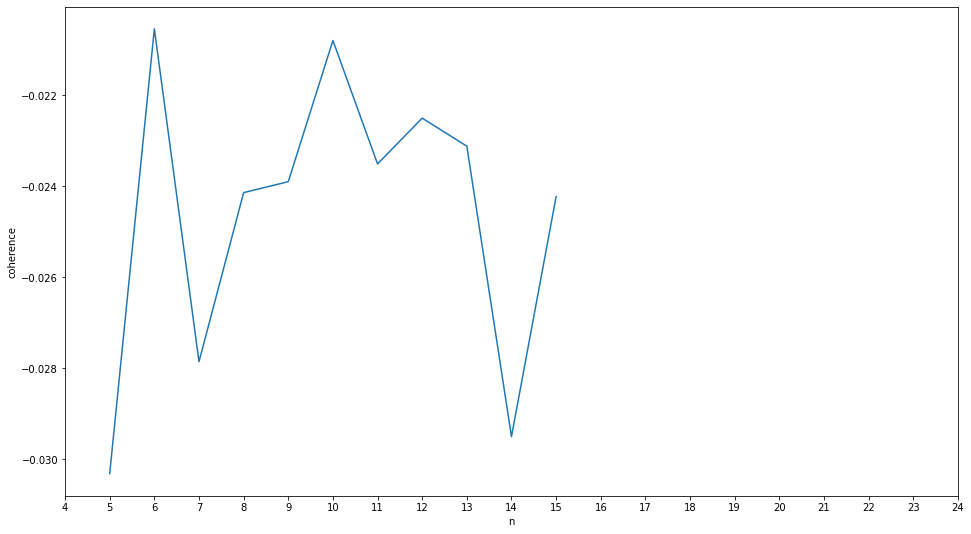

In [ ]:
# Creating lda dataset
lda_df = pd.DataFrame(lda_para_model_n, columns=["n", "model", "coherence"]).set_index("n")[["coherence"]]
plt.figure(figsize=(16,9))
_ = sns.lineplot(x='n', y='coherence', data=lda_df )
_ = plt.xticks(ticks = np.arange(4,25,1))

In [ ]:
# Reset index of the lda dataframe 
lda_df = lda_df.reset_index()
topic_nums = lda_df[lda_df['coherence']==lda_df['coherence'].max()]['n'].to_list()[0]
topic_nums

6

In [ ]:
# lda gensim parameter defining
lda_gensim_para = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=2000, eta='auto', iterations=400,
                            num_topics= topic_nums , passes=20, eval_every=None,
                            random_state=42)

In [ ]:
#function to display gensim topics
def display_gensim_topics(model):
  gen_list = lda_gensim_para.print_topics()
  for i in range(0,len(gen_list)):
    print('Topic: ',i+1,'\n')
    topics = gen_list[i][1]
    for j in topics.split('+'):
      print(j.split('"')[1])

    print("------\n")

display_gensim_topics(lda_gensim_para)

Topic:  1 

to
of
drama
and
hi
crime
in
thriller
actionadventure
's
------

Topic:  2 

of
and
documentary
in
thi
to
's
on
documentari
from
------

Topic:  3 

to
her
hi
drama
comedy
's
and
he
with
when
------

Topic:  4 

to
and
of
in
actionadventure
’
hi
an
s
when
------

Topic:  5 

and
drama
in
of
their
to
with
comedy
an
romance
------

Topic:  6 

and
comedy
in
of
hi
to
''
thi
``
on
------



In [ ]:
# Installing pyldavis
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 9.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6346e034ac1011db647e7740666b704e3be84d76e14ab98c0f46ca8c62900aaf
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ffd9efaf6cec935ab739a76ed7f9132927e07bc1ab639f60a7fb51a2bbac6251
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
# Importing pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
# Prepare gensim model
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(lda_gensim_para, bow_gensim_para, dict_gensim_para)

p

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.099062  0.088827       1        1  22.732525
4     -0.017854  0.032255       2        1  17.918840
1      0.167283 -0.105878       3        1  17.545497
0     -0.121272 -0.084865       4        1  15.700539
3     -0.060923 -0.039490       5        1  15.012137
5      0.131828  0.109150       6        1  11.090462, topic_info=             Term         Freq        Total Category  logprob  loglift
206   documentary  1069.000000  1069.000000  Default  30.0000  30.0000
200           thi  1183.000000  1183.000000  Default  29.0000  29.0000
277        comedy  2312.000000  2312.000000  Default  28.0000  28.0000
184           her  1829.000000  1829.000000  Default  27.0000  27.0000
192         crime   573.000000   573.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1061       family    96.458316   510.542029   Topic6  -5.3012   0.5327
259        friend    96.195649   536.262699   Topic6  -5.3040   0.4808
360            at    93.773799   659.291051   Topic6  -5.3295   0.2488
254            as    99.143095  1056.870624   Topic6  -5.2738  -0.1674
62          their    93.406674  1432.791368   Topic6  -5.3334  -0.5313

[481 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1421      5  0.332401    !
1421      6  0.654079    !
708       6  0.998257   ''
1564      1  0.982206   'd
42        1  0.346853   's
...     ...       ...  ...
311       5  0.194097    –
311       6  0.146839    –
468       5  0.995964    ’
757       3  0.993454    “
758       3  1.002157    ”

[960 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4, 6])

In [ ]:
# Applying LDA to the created dataframe
lda = {}
for i in range(0,lda_gensim_para.num_topics):
  lda[f'Topic {i}'] = np.zeros(df.shape[0])

In [ ]:
# enumerate the topic
for i, row in enumerate(lda_gensim_para[bow_gensim_para]):
  for topic in row:
    lda[f'Topic {topic[0]}'][i] = topic[1] 

In [ ]:
# Creating the dataframe 
topic_model_df = pd.DataFrame(lda)

In [ ]:
# Checking the head of thr dataframe
topic_model_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,0.000000,0.000000,0.000000,0.521365,0.301131,0.155582
1,0.000000,0.000000,0.000000,0.967526,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.968931,0.000000,0.000000
3,0.272616,0.244899,0.066531,0.401326,0.000000,0.000000
4,0.221021,0.310784,0.000000,0.000000,0.445322,0.000000
...,...,...,...,...,...,...
7782,0.000000,0.000000,0.648221,0.000000,0.325871,0.000000
7783,0.000000,0.000000,0.721303,0.000000,0.254670,0.000000
7784,0.000000,0.584275,0.000000,0.000000,0.000000,0.387718
7785,0.000000,0.959916,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Defining function for newly created dataframe
def topic_input(row):
  highest = 0
  top = 'None'
  for topic in topic_model_df.columns:
    if row[topic] > highest:
      highest = row[topic]
      top = f'Topic {int(topic[-1])+1}'
  return top

topic = topic_model_df.apply(lambda x:topic_input(x),axis=1)

## Concatenating clustering_df with topic models

In [ ]:
# Cjecking the head of clustering dataset
clustering_df

,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins
0,2020,1,0,0,0,0,1,4,0,2020
1,2016,1,0,0,0,1,0,0,93,2010
2,2011,1,0,0,0,1,0,0,78,2010
3,2009,0,0,0,1,1,0,0,80,2000
4,2008,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...,...
7782,2005,1,0,0,0,1,0,0,99,2000
7783,2015,0,0,0,1,1,0,0,111,2010
7784,2019,1,0,0,0,1,0,0,44,2010
7785,2019,0,0,1,0,0,1,1,0,2010


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
#vectorizer_clustering = pd.concat([clustering_df.drop(['release_year','Movie','TV Show'], axis=1), pd.get_dummies(clustering_df['release_year'])], a


In [ ]:
# Concat the data for vectorize clustering
vectorizer_clustering = pd.concat([clustering_df.drop(['release_year'], axis=1),], axis =1)

In [ ]:
# Checking the data of  vectorizerclustering
vectorizer_clustering

,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins
0,1,0,0,0,0,1,4,0,2020
1,1,0,0,0,1,0,0,93,2010
2,1,0,0,0,1,0,0,78,2010
3,0,0,0,1,1,0,0,80,2000
4,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...
7782,1,0,0,0,1,0,0,99,2000
7783,0,0,0,1,1,0,0,111,2010
7784,1,0,0,0,1,0,0,44,2010
7785,0,0,1,0,0,1,1,0,2010


In [ ]:
# Applying the mix max scaler for Normalisation
scaler = MinMaxScaler()
X_rescale = scaler.fit_transform(vectorizer_clustering)
#dataset contains degree of belonging of document to each topic concatenated to scaled Dataframe 
X = pd.concat([pd.DataFrame(X_rescale,columns = vectorizer_clustering.columns ),(topic_model_df)],axis=1)

In [ ]:
# Checking the head of the dataset
X

,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,1.0,0.0,0.0,0.0,0.0,1.0,0.2500,0.000000,1.0,0.000000,0.000000,0.000000,0.521365,0.301131,0.155582
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.298077,0.9,0.000000,0.000000,0.000000,0.967526,0.000000,0.000000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.250000,0.9,0.000000,0.000000,0.000000,0.968931,0.000000,0.000000
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0000,0.256410,0.8,0.272616,0.244899,0.066531,0.401326,0.000000,0.000000
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0000,0.394231,0.8,0.221021,0.310784,0.000000,0.000000,0.445322,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.317308,0.8,0.000000,0.000000,0.648221,0.000000,0.325871,0.000000
7783,0.0,0.0,0.0,1.0,1.0,0.0,0.0000,0.355769,0.9,0.000000,0.000000,0.721303,0.000000,0.254670,0.000000
7784,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.141026,0.9,0.000000,0.584275,0.000000,0.000000,0.000000,0.387718
7785,0.0,0.0,1.0,0.0,0.0,1.0,0.0625,0.000000,0.9,0.000000,0.959916,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Converting the data into numpy series
X = X.to_numpy()

In [ ]:
# Checking the shape of the dataset
X.shape

(7787, 15)

## Performing Hopkins test for uniform distribution to check if clustering is possible on the dataset

In [ ]:
# Installing pyclustertend
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 8.5 MB/s 
     |████████████████████████████████| 9.4 MB 26.5 MB/s 
     |████████████████████████████████| 15.4 MB 32 kB/s 
     |████████████████████████████████| 3.3 MB 46.6 MB/s 
     |████████████████████████████████| 295 kB 49.2 MB/s 
     |████████████████████████████████| 965 kB 46.1 MB/s 
     |████████████████████████████████| 26.3 MB 4.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attem

In [ ]:
# Installing numba
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 10.8 MB/s 
     |████████████████████████████████| 25.3 MB 39.6 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.8.2 requires numba<0.55.0,>=0.54.1, but you have numba 0.53.0 which is incompatible.


In [ ]:
# Importing the hopkins library
from pyclustertend import hopkins
hopkins(X,150)

0.05690290825405241

In [ ]:
# Checking the shape of the dataset
X.shape

(7787, 15)

#### CREATING DICTIONARY FOR REPORT

In [ ]:
# Creating the dictionary report
clustering_report = {
    'Algorithm':[],
    'Parameters':[],
    'Clusters':[],
    'Silhouette Coefficient':[],
    'Davies-Bouldin Index': [],
    'Calinski-Harbaz Score': []
}

In [ ]:
# Defining function for Updated report
def update_report(algo_name, details,clusters, sil_score, db_index, ch_score):
  data = [algo_name, details, clusters,sil_score, db_index, ch_score]
  for i,detail in enumerate(clustering_report):
    clustering_report[detail].append(data[i])

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
# Done after applying model

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# NOt required

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.
No, the data is not imbalanced thatswhy not required.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### DBSCAN - Density-based spatial clustering of applications with noise

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

In [ ]:
# ML Model - 1 Implementation
dbscan = DBSCAN().fit(X)
preds = dbscan.labels_



#### CALCULATING SILHOUETTE SCORES

In [ ]:
# Calculate sihouette score
silhouette_score(X,preds)

0.4653076304417927

In [ ]:
# Calculate davies_bouldin_score
davies_bouldin_score(X,preds)

1.4430487176684028

In [ ]:
# Calculate calinski_harabasz_score
calinski_harabasz_score(X,preds)

2487.577338467341

#### NUMBER OF CLUSTERS



In [ ]:
# Deciding the number of cluters
pd.Series(preds).nunique()

10

#### OBSERVATIONS DBSCAN 

clustered the data into 9 clusters with a silhouette score 0.4968

#### VISUALIZATION

For visualization, we're taking three significant components using PCA and plotting them 2 the front,side and top view of the 3d space. This way we can see how the clusters are arranged spatially

In [ ]:
# Creating dataFrame for predictions
predictions = pd.DataFrame(preds, columns = ['Labels'])

#### Dimensionality Reduction - PCA

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components = 3)

In [ ]:
# Applying PCA for dimensionality reduction
reduced = pd.DataFrame(pca.fit_transform(X), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
dbscan_cluster = pd.concat([reduced, predictions], axis=1)

In [ ]:
#setting colors for all visualisations
hundred_colors = " #000000 dimgray #696969 silver #c0c0c0 darkslategray #2f4f4f darkolivegreen #556b2f olivedrab #6b8e23 sienna #a0522d seagreen #2e8b57 forestgreen #228b22 maroon2 #7f0000 midnightblue #191970 darkgreen #006400 olive #808000 darkslateblue #483d8b firebrick #b22222 lightslategray #778899 mediumseagreen #3cb371 rosybrown #bc8f8f rebeccapurple #663399 darkgoldenrod #b8860b darkkhaki #bdb76b darkcyan #008b8b steelblue #4682b4 chocolate #d2691e yellowgreen #9acd32 darkblue #00008b indigo #4b0082 limegreen #32cd32 darkseagreen #8fbc8f darkmagenta #8b008b maroon3 #b03060 mediumturquoise #48d1cc mediumaquamarine #66cdaa darkorchid #9932cc orangered #ff4500 orange #ffa500 gold #ffd700 yellow #ffff00 mediumvioletred #c71585 mediumblue #0000cd burlywood #deb887 chartreuse #7fff00 lime #00ff00 mediumorchid #ba55d3 springgreen #00ff7f darksalmon #e9967a crimson #dc143c aqua #00ffff deepskyblue #00bfff sandybrown #f4a460 mediumpurple #9370db blue #0000ff purple3 #a020f0 lightcoral #f08080 greenyellow #adff2f tomato #ff6347 thistle #d8bfd8 fuchsia #ff00ff palevioletred #db7093 khaki #f0e68c laserlemon #ffff54 cornflower #6495ed plum #dda0dd lightgreen #90ee90 lightblue #add8e6 deeppink #ff1493 mediumslateblue #7b68ee violet #ee82ee lightskyblue #87cefa aquamarine #7fffd4 lightgoldenrod #fafad2 hotpink #ff69b4 mistyrose #ffe4e1 lightcyan #e0ffff pink #ffc0cb"
colors = [color for color in hundred_colors.split(' ') if '#' in color]

#looping to shuffle colors
np.random.seed(151203)
shuffled = []
while len(colors)!=0:
  a = np.random.choice(colors)
  shuffled.append(a)
  colors.remove(a)

In [ ]:
# Checking unique values
gyr = shuffled[:pd.Series(preds).nunique()]

In [ ]:
# Observing colour palette using sns plot
sns.color_palette(gyr)

[(1.0, 0.4117647058823529, 0.7058823529411765),
 (0.2823529411764706, 0.23921568627450981, 0.5450980392156862),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5764705882352941, 0.4392156862745098, 0.8588235294117647),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353),
 (1.0, 0.38823529411764707, 0.2784313725490196),
 (1.0, 0.6470588235294118, 0.0),
 (1.0, 1.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.6, 0.19607843137254902, 0.8)]

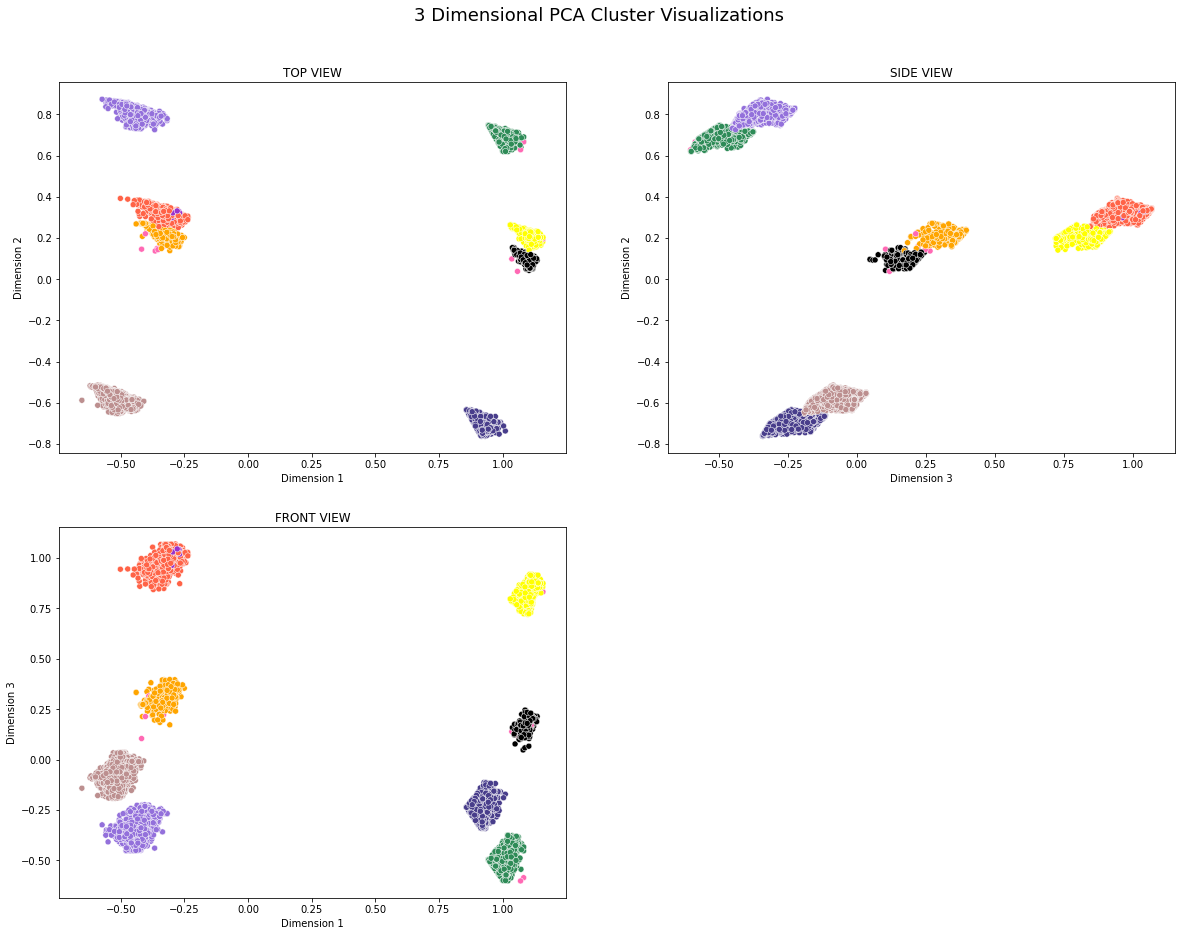

In [ ]:
# Visualizing the number of clusters using scatter plot

plt.figure(figsize=(20,15))
plt.suptitle("3 Dimensional PCA Cluster Visualizations", fontsize=18, y=0.95)

plt.subplot(2,2,1)
plt.title('TOP VIEW')
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 2', data = dbscan_cluster,palette = sns.color_palette(gyr), hue = 'Labels', legend=False)

plt.subplot(2,2,2)
plt.title('SIDE VIEW')
sns.scatterplot(x = 'Dimension 3', y = 'Dimension 2',  data = dbscan_cluster,palette = sns.color_palette(gyr), hue = 'Labels', legend=False)

plt.subplot(2,2,3) 
plt.title('FRONT VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 3', data = dbscan_cluster,palette = sns.color_palette(gyr), hue = 'Labels',legend=False)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

FITTING AND PREDICTING DATA WITH DBSCAN with default values

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.
In unsupervised learning, such as clustering, there is usually no clear definition of error. Due to this, also cross-validation cannot be used for this purpose. However, there are some methods that determine the quality of a clustering via its stability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### K-MEANS Clustering Algorithms

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

In [ ]:
# Calculating Evaluation matrix silhouette score

silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(2,21)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=10)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

In [ ]:
# Applying K means clustering and putting it into dataframe
Kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])

#### Clusters vs Silhouette score

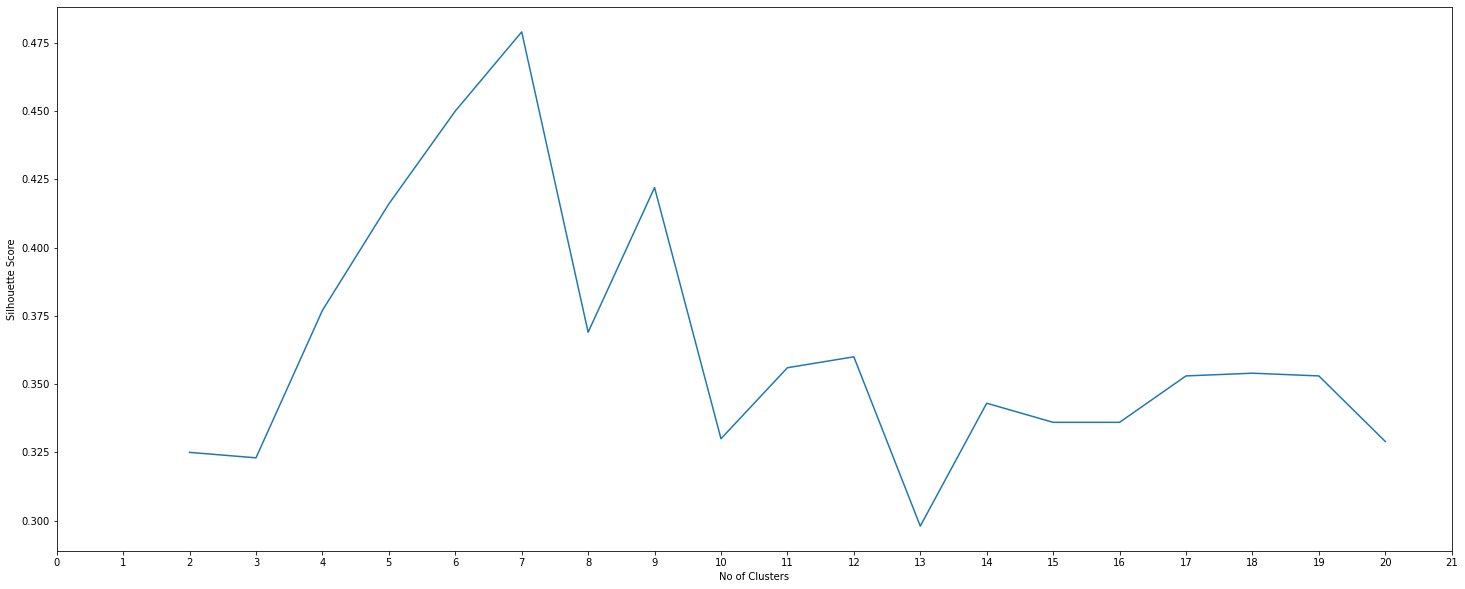

In [ ]:
# visualize the number of cluster vs silhouette score using line plot

plt.figure(figsize=(25,10))
_ = sns.lineplot(x = Kmeans['No of Clusters'], y = Kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(0,22,1))

In [ ]:
# Sorting values of score and number of clusters
Kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False).head()


,No of Clusters,Silhouette Score
5,7,0.479
4,6,0.450
7,9,0.422
3,5,0.416
2,4,0.377


 The highest silhouette score is 0.460 produced with 8 Clusters using K Means Algorithm

#### Using Elbow Method to determine the Optimal number of Clusters


Elbow Method - The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

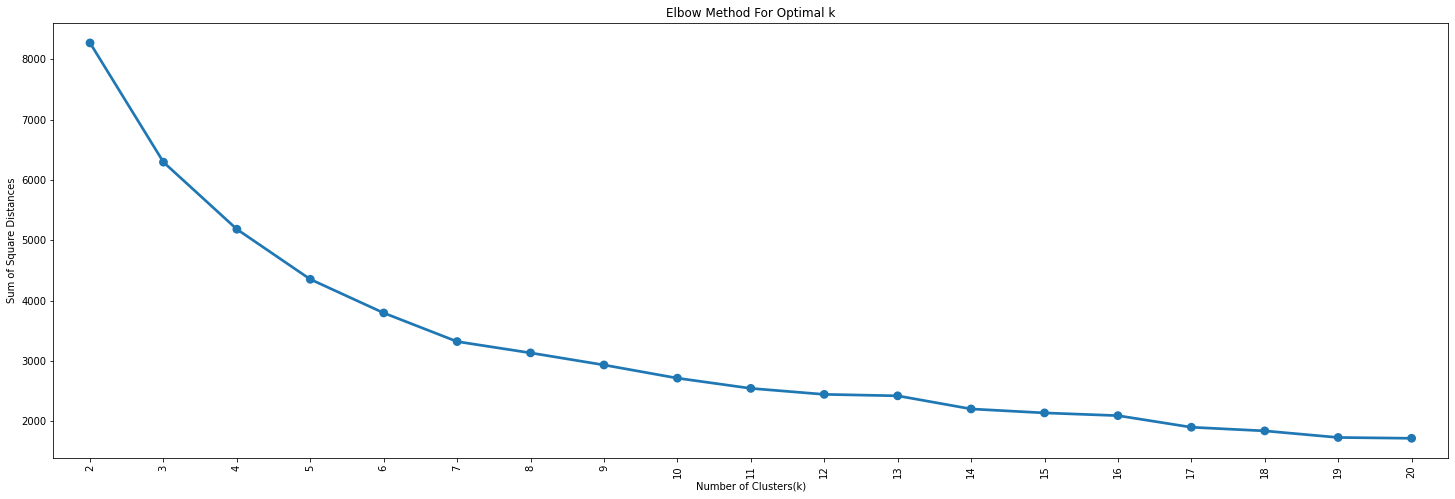

In [ ]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(rotation = 90)
plt.show()

 From the above graph has plots of the sum squared inertia for K clusters trained on K means algorithm In this graph, we decide the optimal number of clusters by locating the elbow of the graph which is at 8 clusters

#### Displaying Silhouette plot for K means Clustering

For n_clusters = 2 The average silhouette_score is : 0.3246237569733917
For n_clusters = 3 The average silhouette_score is : 0.32273171501929826
For n_clusters = 4 The average silhouette_score is : 0.3766735212554828
For n_clusters = 5 The average silhouette_score is : 0.41581927131328505
For n_clusters = 6 The average silhouette_score is : 0.4495625741530323
For n_clusters = 7 The average silhouette_score is : 0.47934913231705184
For n_clusters = 8 The average silhouette_score is : 0.3688831115290185
For n_clusters = 9 The average silhouette_score is : 0.42166988453450666
For n_clusters = 10 The average silhouette_score is : 0.32967643229567895
For n_clusters = 11 The average silhouette_score is : 0.356432434395773
For n_clusters = 12 The average silhouette_score is : 0.35993028975647195
For n_clusters = 13 The average silhouette_score is : 0.29845011713505143
For n_clusters = 14 The average silhouette_score is : 0.3430731898567387
For n_clusters = 15 The average silhouette_score is :

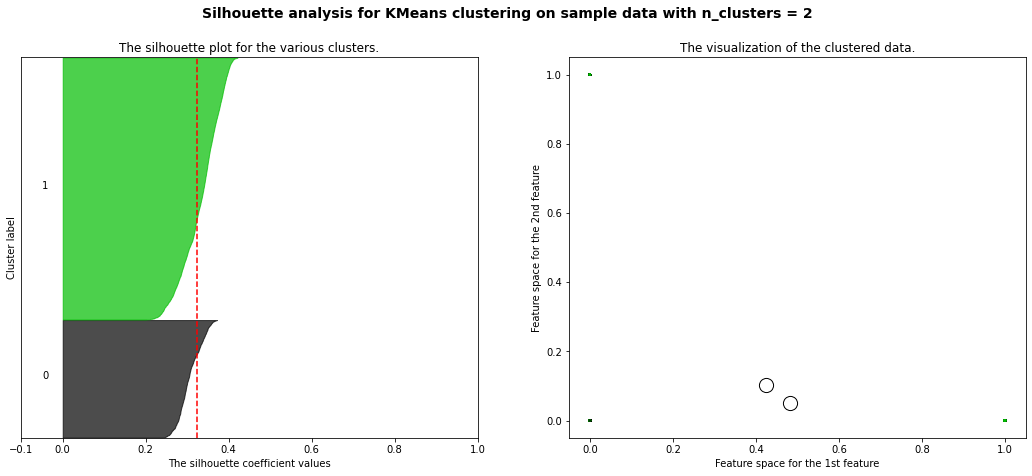

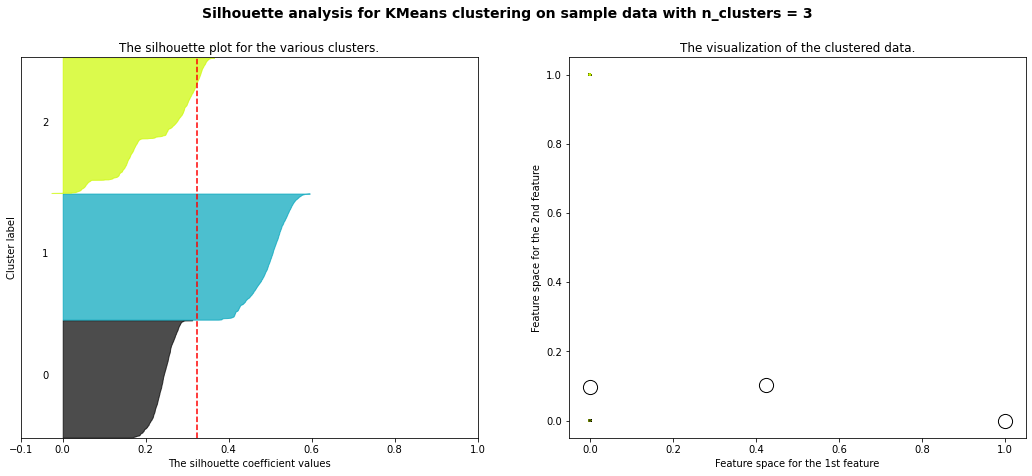

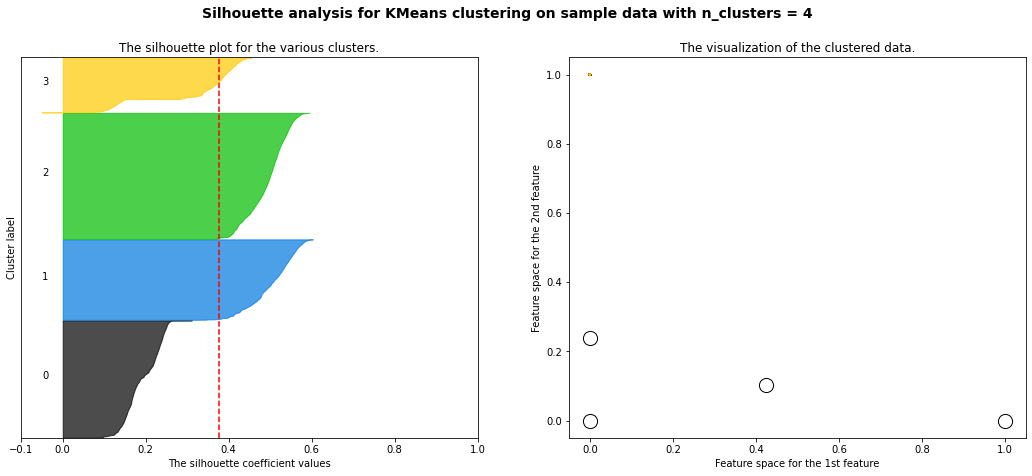

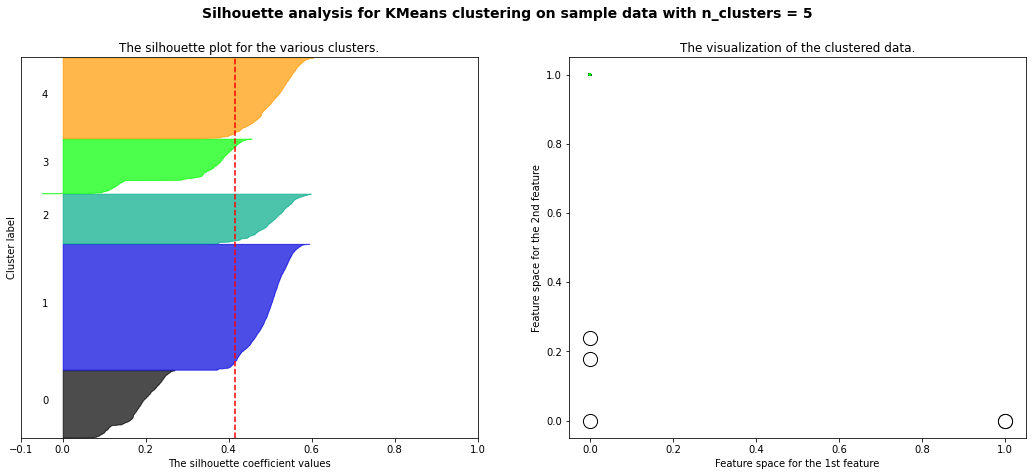

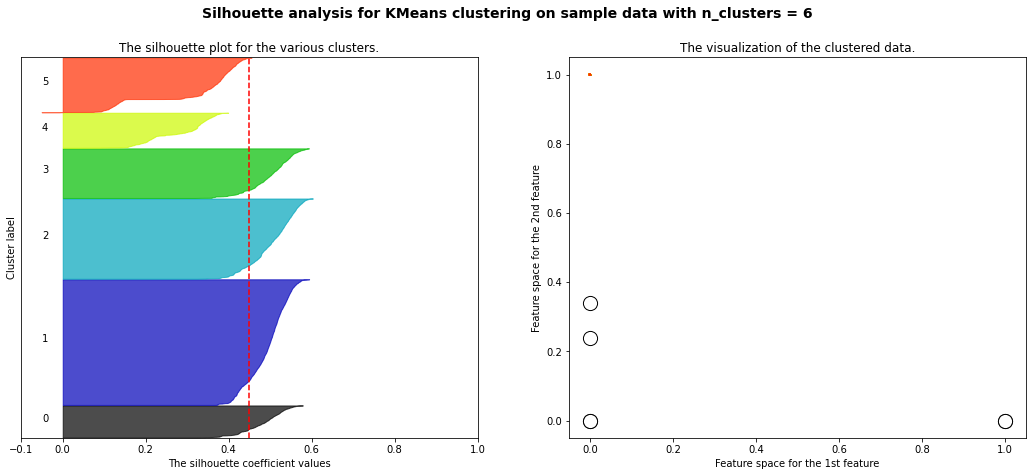

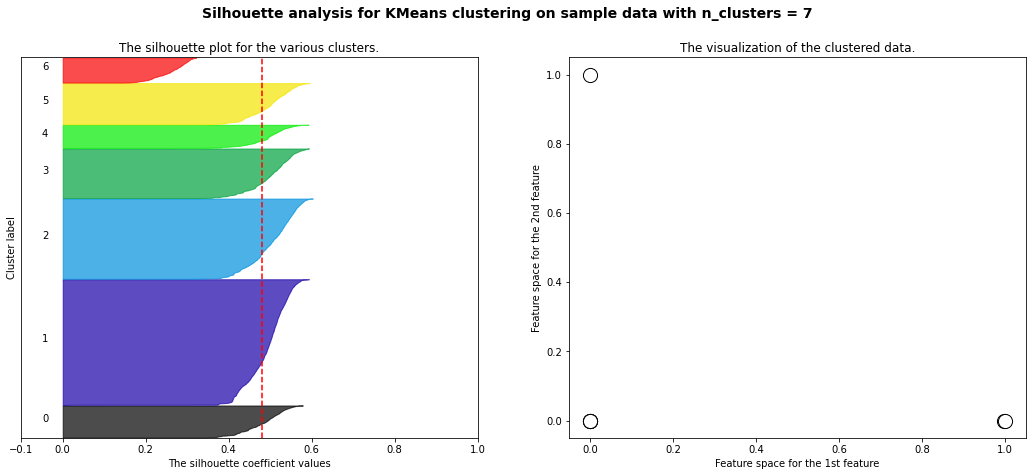

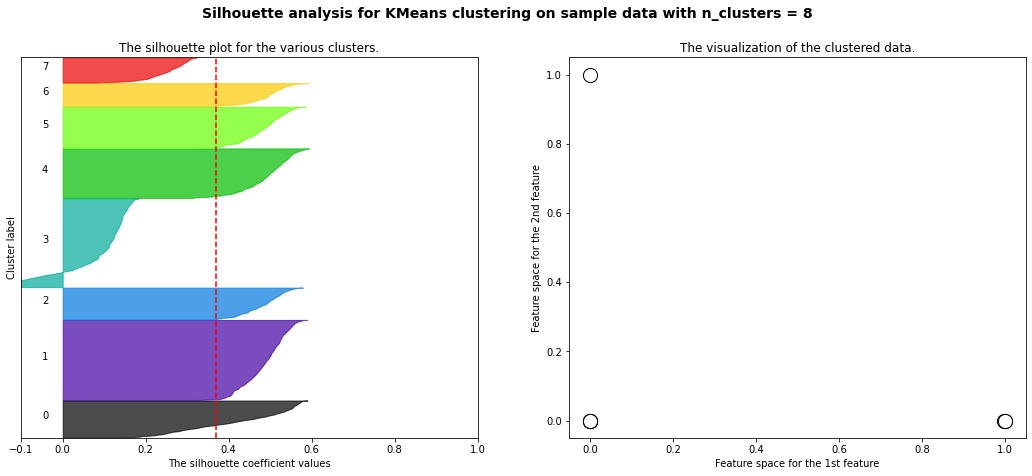

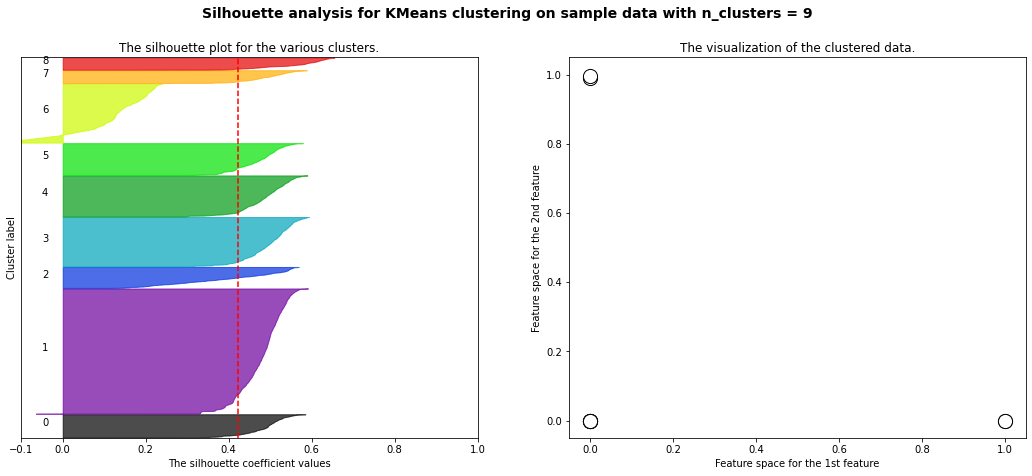

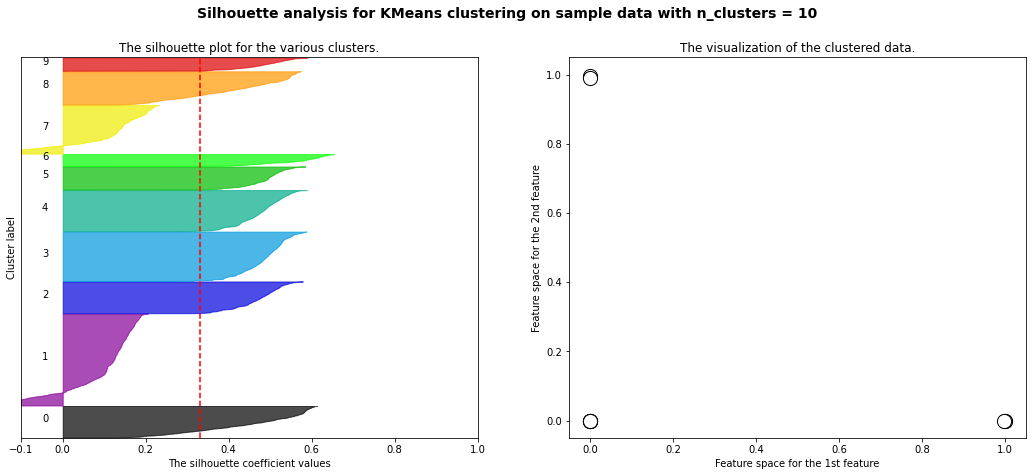

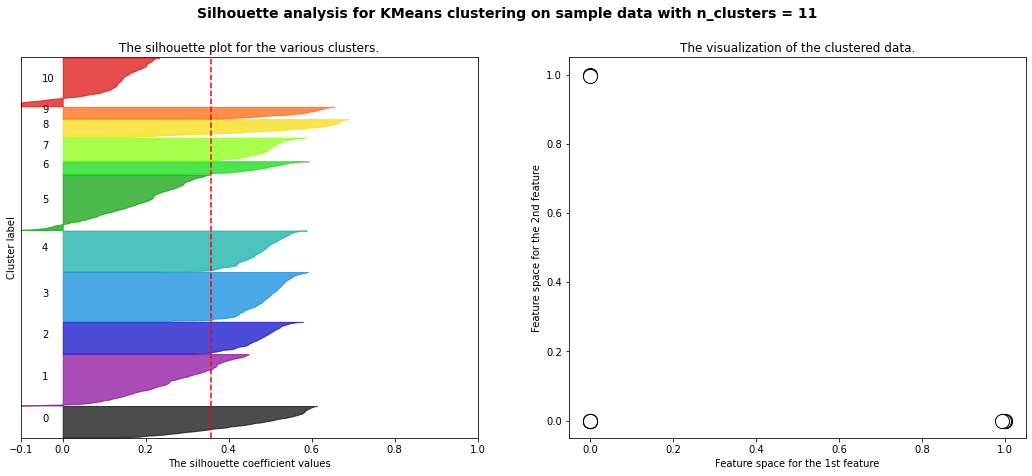

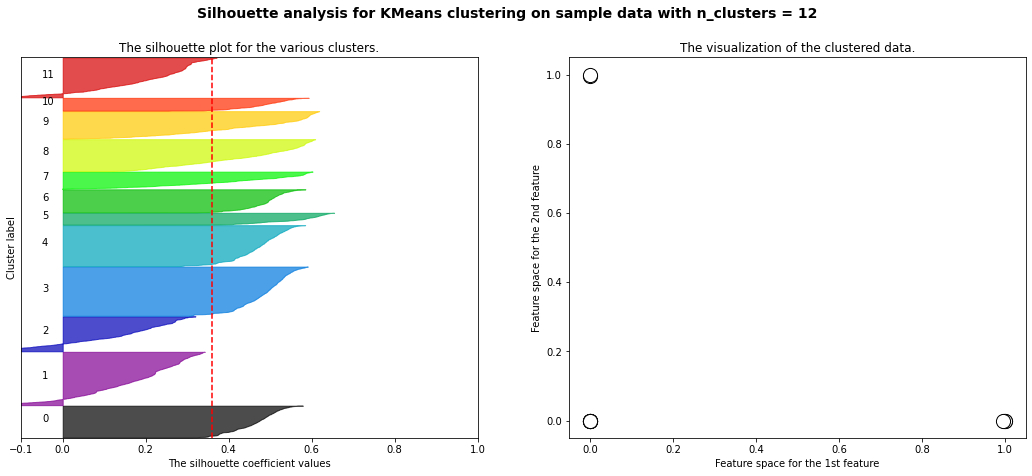

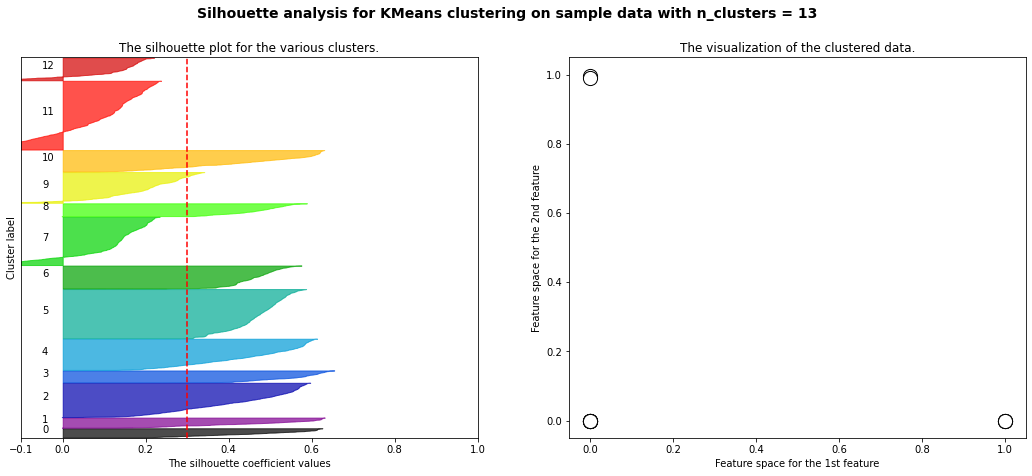

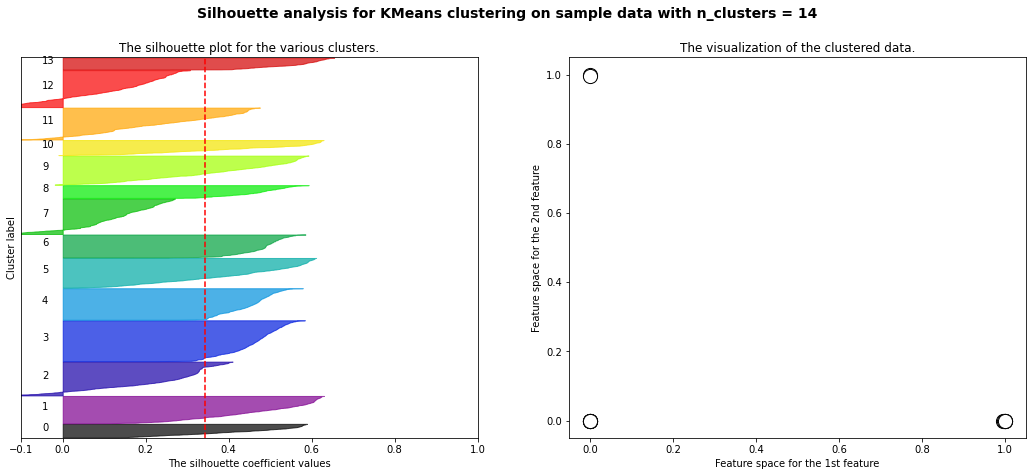

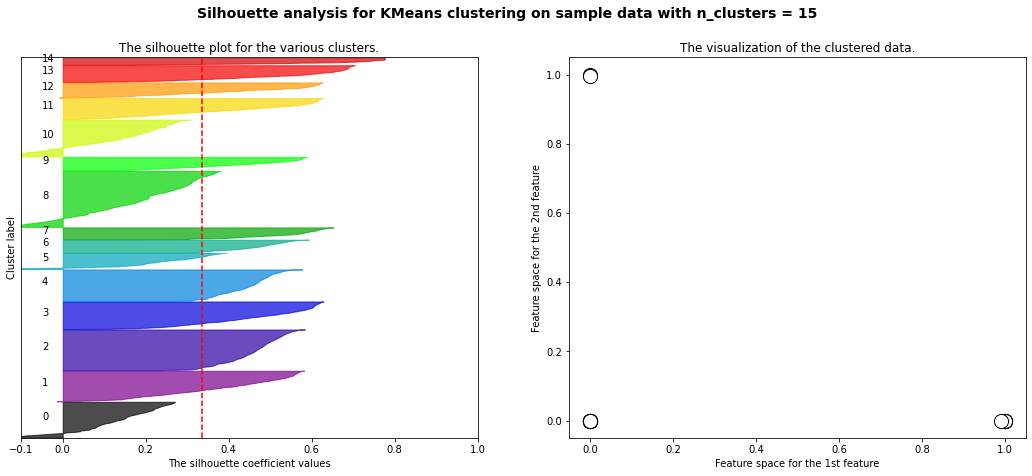

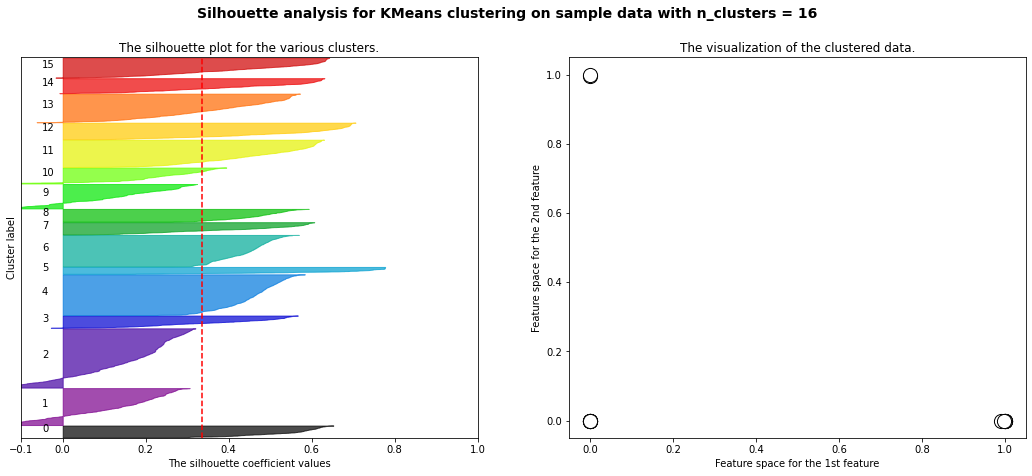

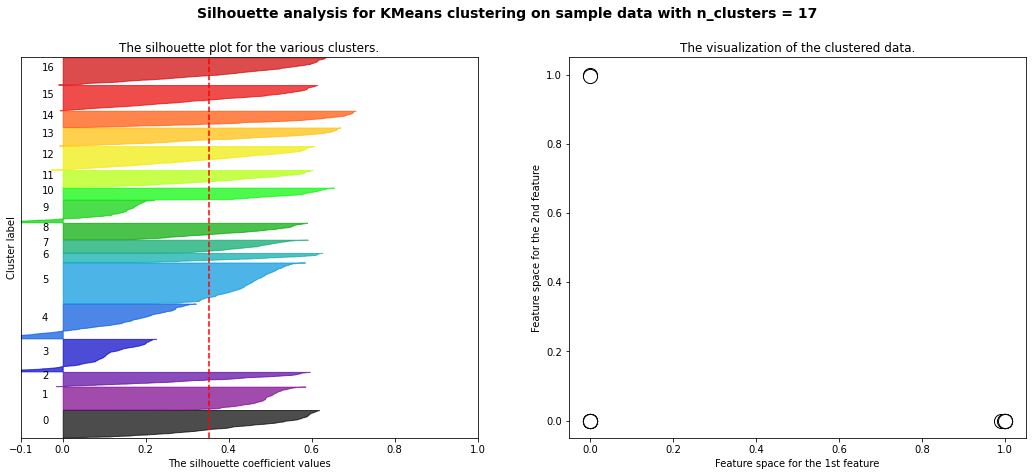

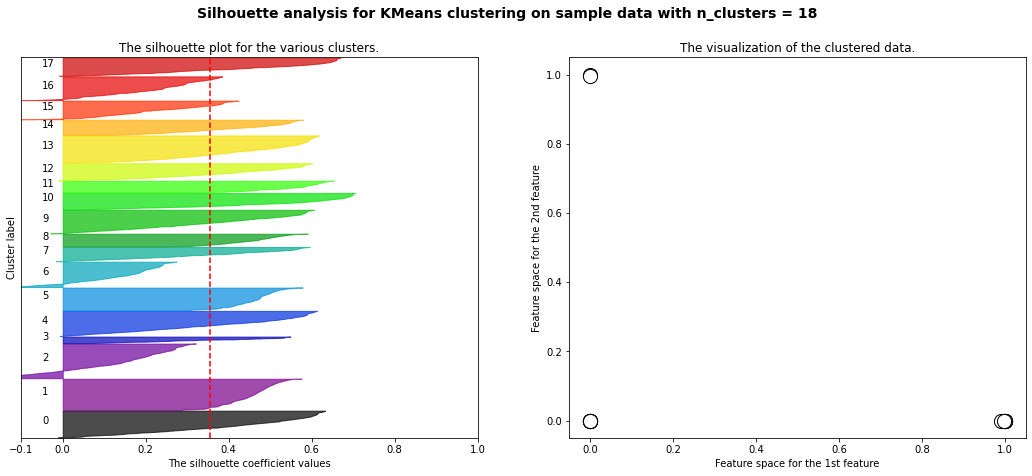

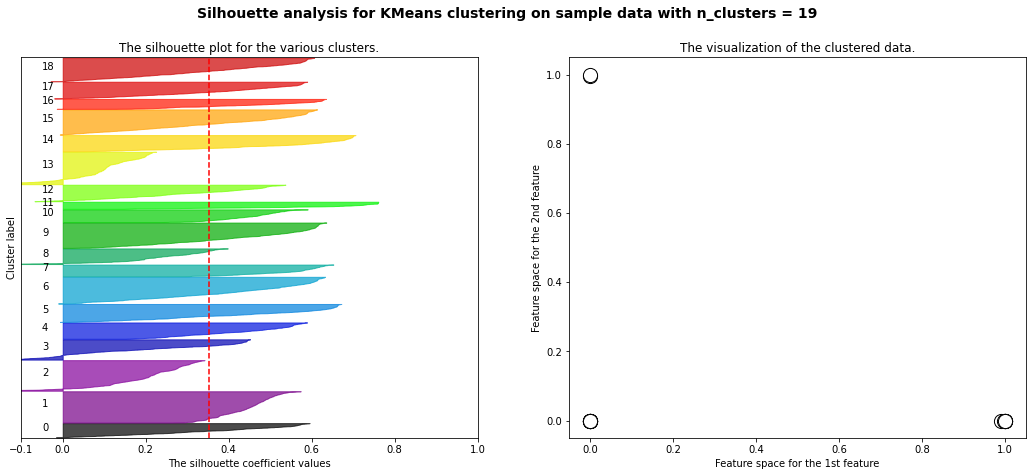

In [ ]:
# Observing the silhpouette plot for k means clustering
range_n_clusters = [i for i in range(2,20)]
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From Silhouette Analysis and Elbow method, the optimal cluster is 8. This gives a clustering score of 0.389

#### VISUALIZATION for K = 8 Clusters

For visualization, we're taking three significant components using PCA and plotting them 2 the front,side and top view of the 3d space. This way we can see how the clusters are arranged spatially

In [ ]:
# Defining the numbers of clusters anf fitting the model
clusterer = KMeans(n_clusters= 8, n_init=10,random_state=10)
preds = clusterer.fit_predict(X)

In [ ]:
# Updating the report using all evaluation matrix
update_report('KMeans','Default' ,pd.Series(preds).nunique(), silhouette_score(X,preds), davies_bouldin_score(X,preds), calinski_harabasz_score(X,preds))

In [ ]:
# Creating the dataframe and using that make predictions 
predictions = pd.DataFrame(preds, columns = ['Clusters'])

In [ ]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [ ]:
# Concatenating values
reduced = pd.DataFrame(pca.fit_transform(X), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)

In [ ]:
#setting colors for all visualisations
hundred_colors = " #000000 dimgray #696969 silver #c0c0c0 darkslategray #2f4f4f darkolivegreen #556b2f olivedrab #6b8e23 sienna #a0522d seagreen #2e8b57 forestgreen #228b22 maroon2 #7f0000 midnightblue #191970 darkgreen #006400 olive #808000 darkslateblue #483d8b firebrick #b22222 lightslategray #778899 mediumseagreen #3cb371 rosybrown #bc8f8f rebeccapurple #663399 darkgoldenrod #b8860b darkkhaki #bdb76b darkcyan #008b8b steelblue #4682b4 chocolate #d2691e yellowgreen #9acd32 darkblue #00008b indigo #4b0082 limegreen #32cd32 darkseagreen #8fbc8f darkmagenta #8b008b maroon3 #b03060 mediumturquoise #48d1cc mediumaquamarine #66cdaa darkorchid #9932cc orangered #ff4500 orange #ffa500 gold #ffd700 yellow #ffff00 mediumvioletred #c71585 mediumblue #0000cd burlywood #deb887 chartreuse #7fff00 lime #00ff00 mediumorchid #ba55d3 springgreen #00ff7f darksalmon #e9967a crimson #dc143c aqua #00ffff deepskyblue #00bfff sandybrown #f4a460 mediumpurple #9370db blue #0000ff purple3 #a020f0 lightcoral #f08080 greenyellow #adff2f tomato #ff6347 thistle #d8bfd8 fuchsia #ff00ff palevioletred #db7093 khaki #f0e68c laserlemon #ffff54 cornflower #6495ed plum #dda0dd lightgreen #90ee90 lightblue #add8e6 deeppink #ff1493 mediumslateblue #7b68ee violet #ee82ee lightskyblue #87cefa aquamarine #7fffd4 lightgoldenrod #fafad2 hotpink #ff69b4 mistyrose #ffe4e1 lightcyan #e0ffff pink #ffc0cb"
colors = [color for color in hundred_colors.split(' ') if '#' in color]

#looping to shuffle colors
np.random.seed(151203)
shuffled = []
while len(colors)!=0:
  a = np.random.choice(colors)
  shuffled.append(a)
  colors.remove(a)

In [ ]:
# Calculating unique values
gyr = shuffled[:pd.Series(preds).nunique()]

In [ ]:
# Observing colou palette
sns.color_palette(gyr)

[(1.0, 0.4117647058823529, 0.7058823529411765),
 (0.2823529411764706, 0.23921568627450981, 0.5450980392156862),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5764705882352941, 0.4392156862745098, 0.8588235294117647),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353),
 (1.0, 0.38823529411764707, 0.2784313725490196),
 (1.0, 0.6470588235294118, 0.0),
 (1.0, 1.0, 0.0)]

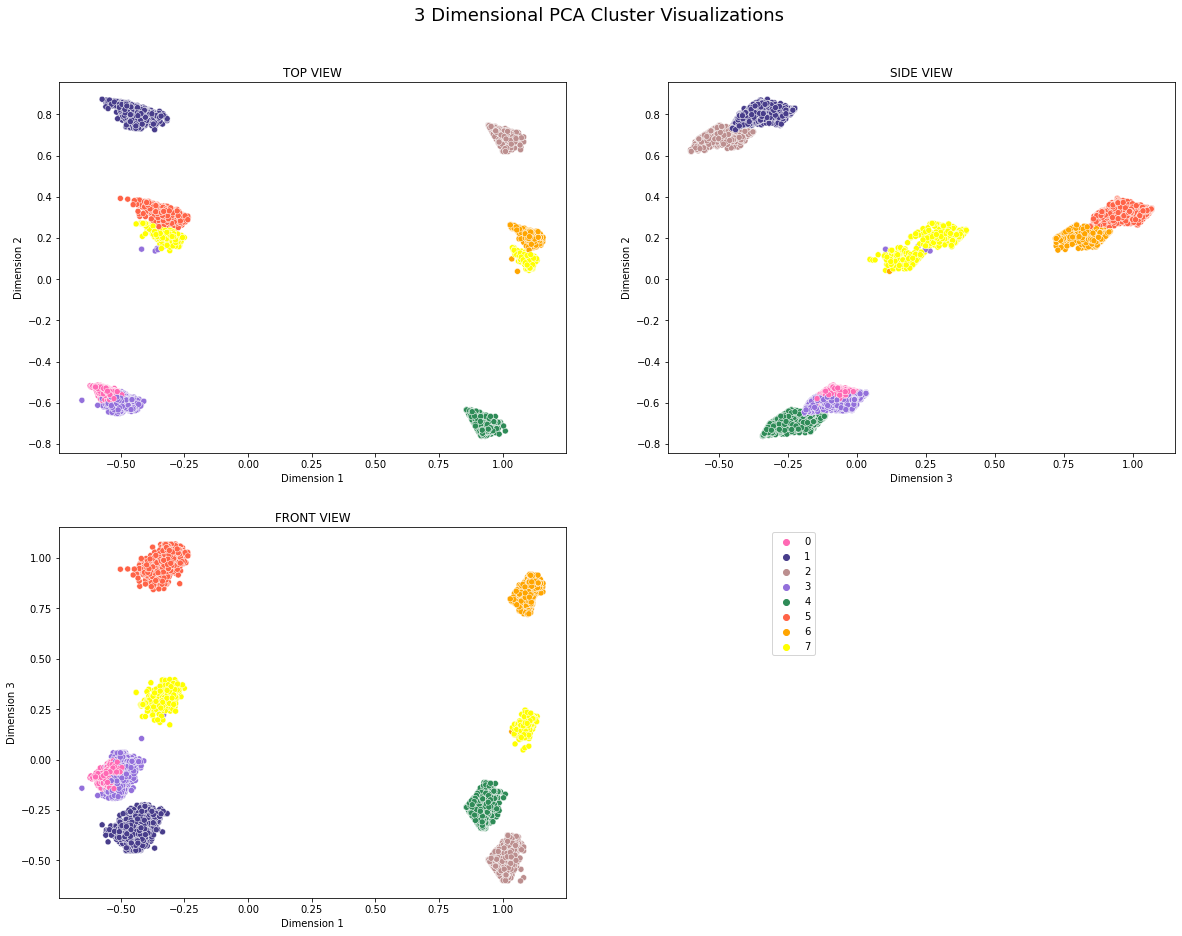

In [ ]:
# 3 Dimensional PCA Cluster Visualizations

from matplotlib import transforms
plt.figure(figsize=(20,15))
plt.suptitle("3 Dimensional PCA Cluster Visualizations", fontsize=18, y=0.95)

plt.subplot(2,2,1)
plt.title('TOP VIEW')
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 2', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr), legend=False
                )

plt.subplot(2,2,2)
plt.title('SIDE VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 3', y = 'Dimension 2', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr), legend=False)

plt.subplot(2,2,3) 
plt.title('FRONT VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 3', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr))
plt.legend(bbox_to_anchor=(1.5,1))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar propert

Implementing K-means clustering and calculating the Silhouette scores for clusters of 2 to 25 for content based on Release Year, Ratings, Type and Duration

A silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. The silhouette plots can be used to select the most optimal value of the K

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Not Reqiured

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In unsupervised learning, such as clustering, there is usually no clear definition of error. Due to this, also cross-validation cannot be used for this purpose. However, there are some methods that determine the quality of a clustering via its stability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### Silhouette Score

The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.

#### Calinski-Harabasz Index

Calinski-Harabasz Index is also known as the Variance Ratio Criterion.
The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does not require information on the ground truth labels.

#### Davies-Bouldin Index

The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.
The minimum score is zero, and differently from most performance metrics, the lower values the better clustering performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

We are able to cluster the data into multiple cluters according to which we can categories the datapoints into similar cluster and other into disimilar cluster and after that making insights for particular cluster not on whole data.

### ML Model - 3

####  HIERARCHICAL CLUSTERING

Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

As you go down the hierarchy from 1 cluster (contains all the data) to n clusters (each observation is its own cluster), the clusters become more and more similar (almost always). There are two types of hierarchical clustering: divisive (top-down) and agglomerative (bottom-up)

In [ ]:
# ML Model - 3 Implementation
# Let's import sch
import scipy.cluster.hierarchy as sch
hier_ward_euc = sch.linkage(X, method = 'ward', metric = 'euclidean')


#### DENDROGRAM

We can use a dendrogram to represent the relationships between any kinds of entities as long as we can measure their similarity to each other. In Lexomic analysis, we compare the distribution of different words among whole texts or segments of texts.

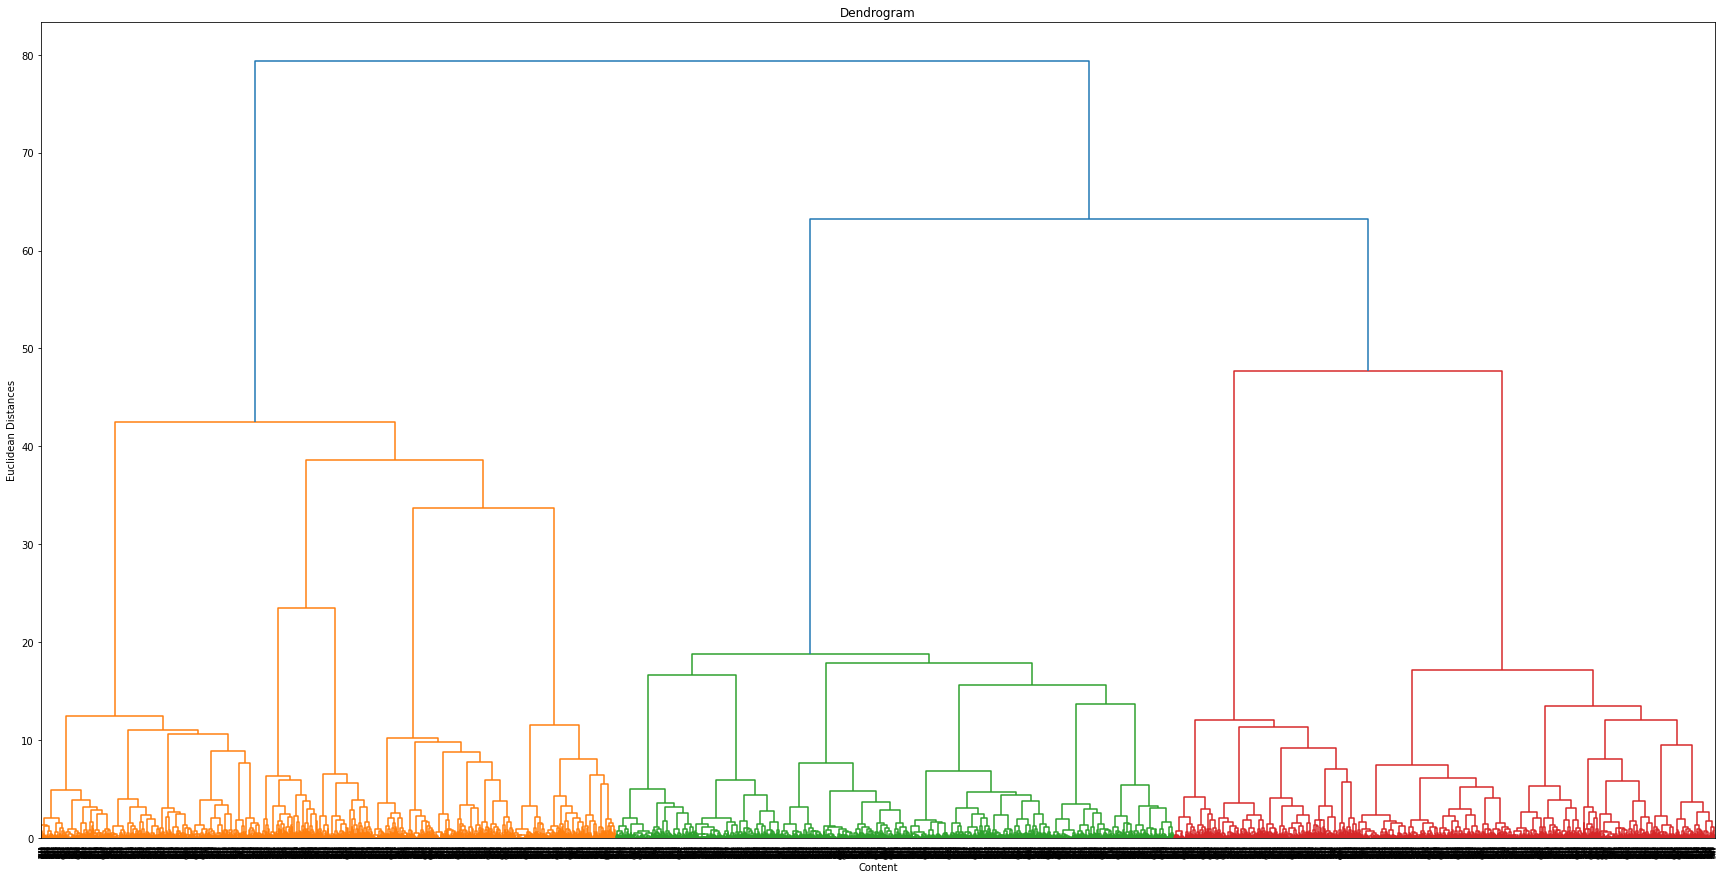

In [ ]:
# Plotting dendogram and observing different features into depth
plt.figure(figsize=(30,15))
dendrogram = sch.dendrogram(hier_ward_euc)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

FROM DENDOGRAM, A DISTANCE OF 20-30 appears to have well defined trees.

CHOOSING THE APPROPRIATE DISTANCE TO CLUSTER

#### Agglomerative Hierarchical Clustering

This algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This is a bottom-up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In [ ]:
# Applying Agglomerative hierarchical clustering
clusters = []
scores = []
distances = []
for i in np.arange(5,75,5):
  hc = AgglomerativeClustering(n_clusters = None, distance_threshold = i, affinity = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(X)
  clusters.append(hc.labels_.max()+1)
  if (hc.labels_.max()+1 >=2) :
    scores.append(silhouette_score(X, y_hc))
  else:
    scores.append(1)
  distances.append(i)

hierarchical = pd.DataFrame({'Clusters': clusters, 
                             'Silhouette Scores': scores,
                             'Distance': distances})

DISTANCE vs SILHOUETTE SCORES GRAPH FOR HIERARCHICAL CLUSTERING

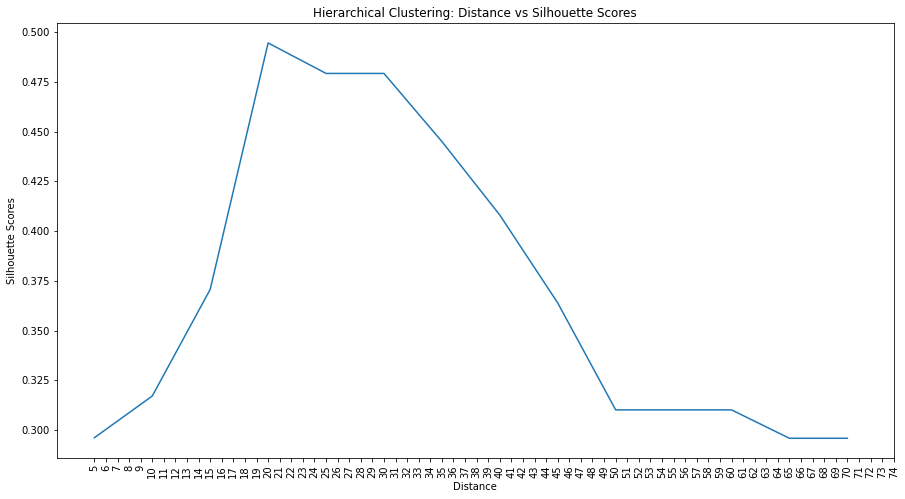

In [ ]:
# Plotting graph of DISTANCE vs SILHOUETTE SCORES GRAPH FOR HIERARCHICAL CLUSTERIN
plt.figure(figsize =(15,8))
sns.lineplot(x = 'Distance', y = 'Silhouette Scores' , data = hierarchical)
a = plt.title('Hierarchical Clustering: Distance vs Silhouette Scores')
_ = plt.xticks(np.arange(5,75,1),rotation = 90)

Distance-Silhouette Score-Clusters Table for Hierarchical Clustering

In [ ]:
# Sorting values of silhouette score and distance
hierarchical.sort_values('Silhouette Scores', ascending = False).head()

,Clusters,Silhouette Scores,Distance
3,8,0.494598,20
4,7,0.479274,25
5,7,0.479274,30
6,6,0.445051,35
7,5,0.408102,40


 Highest Silhouette Score of 0.498 achieved at distance = 20 with 8 clusters

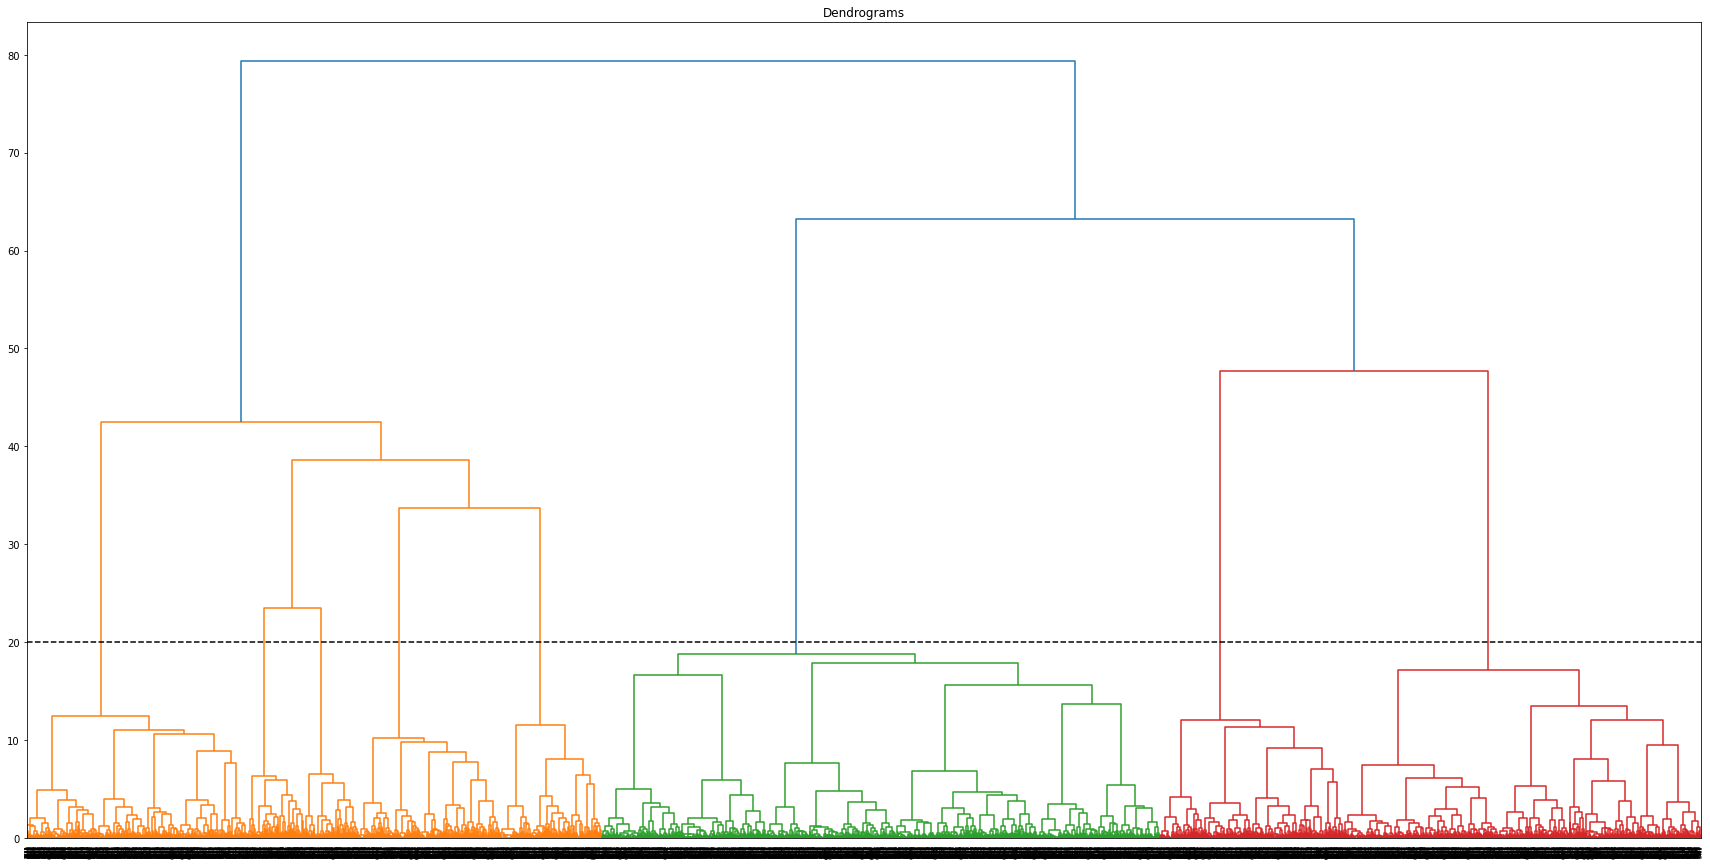

In [ ]:
# Visualizing the dendogram for the agg;omerative clustering
plt.figure(figsize =(30,15))
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y= 20, color='black', linestyle='--')

VISUALIZATION for Distance = 20

For visualization, we're taking three significant components using PCA and plotting them 2 the front,side and top view of the 3d space. This way we can see how the clusters are arranged spatially

In [ ]:
# Fitting the model for agglomerative clustering
hc = AgglomerativeClustering(n_clusters = None, distance_threshold = 20, affinity = 'euclidean', linkage = 'ward')
preds = hc.fit_predict(X)

In [ ]:
# Updating the report for agglomerative hierarchical clustering
update_report('Hierarchical Agglomerative','Distance = 20' ,pd.Series(preds).nunique(), silhouette_score(X,preds), davies_bouldin_score(X,preds), calinski_harabasz_score(X,preds))

In [ ]:
# Observinf predictions for above model
predictions = pd.DataFrame(preds, columns = ['Labels'])

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components = 3)

In [ ]:
# Reducing the feature using dimensionality reduction -PCA
reduced = pd.DataFrame(pca.fit_transform(X), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
hier_cluster = pd.concat([reduced, predictions], axis=1)

In [ ]:
#  Obseving the colour palette
colors = shuffled[:pd.Series(hc.labels_).nunique()]

sns.color_palette(colors)

[(1.0, 0.4117647058823529, 0.7058823529411765),
 (0.2823529411764706, 0.23921568627450981, 0.5450980392156862),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5764705882352941, 0.4392156862745098, 0.8588235294117647),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353),
 (1.0, 0.38823529411764707, 0.2784313725490196),
 (1.0, 0.6470588235294118, 0.0),
 (1.0, 1.0, 0.0)]

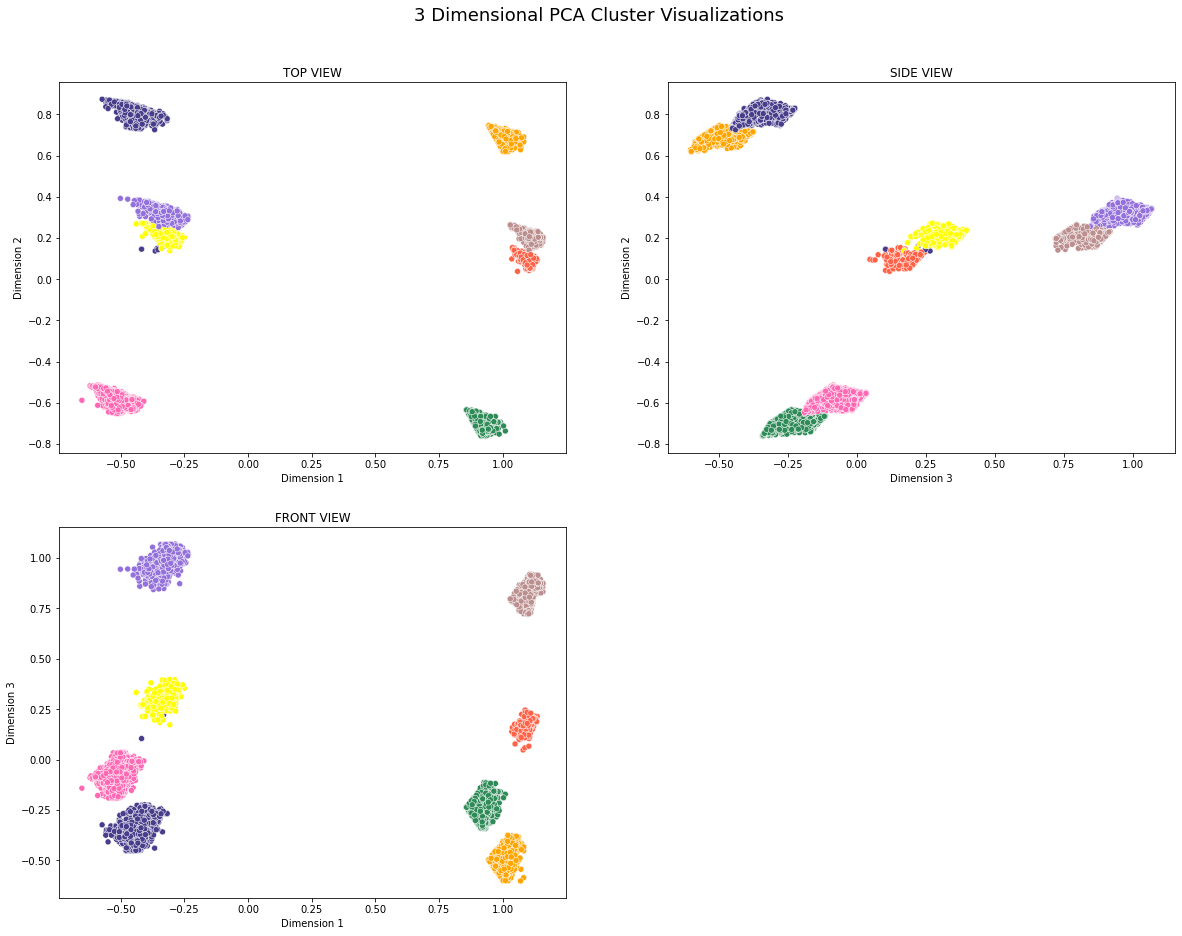

In [ ]:
# Plotting the 3 Dimensional PCA Cluster Visualizations
plt.figure(figsize=(20,15))
plt.suptitle("3 Dimensional PCA Cluster Visualizations", fontsize=18, y=0.95)

plt.subplot(2,2,1)
plt.title('TOP VIEW')
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 2', data = hier_cluster, hue = 'Labels',palette = sns.color_palette(colors), legend=False)

plt.subplot(2,2,2)
plt.title('SIDE VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 3', y = 'Dimension 2',  data = hier_cluster, hue = 'Labels',palette = sns.color_palette(colors), legend=False)

plt.subplot(2,2,3) 
plt.title('FRONT VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 3', data = hier_cluster, hue = 'Labels',palette = sns.color_palette(colors), legend=False)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

## FINAL REPORT

After optimizing and selecting the best number of clusters for the three models, the final report is displayed down below

In [ ]:
# Clustering report for k - means and hierarchical clustering methods
pd.DataFrame(clustering_report)

,Algorithm,Parameters,Clusters,Silhouette Coefficient,Davies-Bouldin Index,Calinski-Harbaz Score
0,KMeans,Default,8,0.368883,1.135149,3080.742074
1,Hierarchical Agglomerative,Distance = 20,8,0.494598,0.850820,3198.929905


##### Which hyperparameter optimization technique have you used and why?

Answer Here.


In unsupervised learning, such as clustering, there is usually no clear definition of error. Due to this, also cross-validation cannot be used for this purpose. However, there are some methods that determine the quality of a clustering via its stability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes , We get the better results hierarchical clustering and agglomerative clustering technique and getting better result for calinski-Harbaz score and Silhouette Coefficient but for davies-Bouldin Index we get better result for K - Means clustering.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.
Silhoueete score evaluation metrics i consider for a positive business impact.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

Silhouette score, i choose from the above created model as my final prediction model beacuse it is a metric used to calculate the goodness of a clustering technique.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


#1. Exploratory Data Analysis Conclusions
Netflix began adding videos to the platform from 2008
The streaming giant started aggressively adding movies and TV shows from 2017
More movies are added as compared to TV shows
There are almost twice as many movies as TV shows on Netflix.
Most content on Netflix is rated for Mature Audiences and over 14 years old

**Top Countries in Netflix are**:

United States
India
United Kingdom
Canada
France

**Top Genres in Netflix are:**

1Drama
2.Comedy 3.Documentary 4.Action and Adventure 5.Romance

**Top Directors on Netflix are**:

1Jan Suter
2.Raul Campos 3.Marcus Raboy 4.Jay Karas 5.Cathy Garcia-Molina

**Top Actors on Netflix are:**

1Anupam Kher
2.Shah Rukh Khan 3.Naseeruddin Shah 4.Om Puri 5.Akshay Kumar


Most movies on Netflix have a duration range from 90 to 110 minutes
Most TV shows on Netflix have a span of only one season

#2. Analysis of Content produced in different countries

Drama is the most produced genre in a lot of Non-English speaking countries
Comedy is the most produced genre in English speaking countries like United States of America and United Kingdom and Canada
Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea
Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan
Most South Korean content are from the Romance genre*
Documentaries are mainly produced in United Kingdom and United States of America

#3. Has Netflix been focusing increasingly on TV showss as compared to movies
From the first graph in the section, we can observe that seasons of TV shows signed vs the movies signed
This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier
We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year

From the second graph in the section, we can observe an estimation of seasonal TV show and Movie release date per each year. We make a general assumption that each show releases a season yearly which is often the case for most TV shows.
There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022.
We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010
Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year

#4.1 Topic Modeling
Gensim Latent Drichlet was used to model textual data[description, genres, directors and cast] into topics
Nine topics were decided to be the most suitable from comparing Coherence Scores for different topic numbers.
The topics for each document will be used to classify the documents based on text as clustering can effectively handle so many values
The table also contains how much a document belongs to each topic, thus allowing content to be a mixture of different themes with their own respective topic weightages
By using this is as inputs, no data is lost in dimensionality reduction. The documents are classified based on their topics which is expected to be more sensible/insightful as an input
The Topics and corresponding top words are given down below:

Topic: 1

drama
comedy
famili
romance
find
young
woman
life
love
man

Topic: 2

drama
horror
thriller
romance
school
comedy
young
teen
student
life

Topic: 3

actionadventure
scififantasy
drama
sports
anime
team
world
kids
power
save

Topic: 4

comedy
drama
school
family
high
new
teen
world
student
scififantasy

Topic: 5

crime
drama
thriller
actionadventure
murder
investig
cop
polic
detect
drug

Topic: 6

documentary
documentari
music
seri
stori
explor
life
film
world
follow

Topic: 7

comedy
drama
romance
new
find
year
life
love
get
friend

Topic: 8

drama
comedy
romance
love
famili
man
young
woman
life
two

Topic: 9

comedy
kids
reality
friend
family
comedi
special
show
stand
comedian

#4.2 Clustering Results


#K-MEANS
From the elbow graph and silhouette analysis, the best model has a silhouette score of 0.49346 produced with 8 Clusters using K Means Algorithm
The model also had a Davies-Bouding Index of 0.8395 and Calinski-Harbaz Score of 3353

#Hierarchical Clustering
Using dendograms and comparing various distance thresholds, a distance of 20 produced the highest silhouette score of 0.495390 with 8 clusters
The model also had a Davies-Bouding Index of 0.8295 and Calinski-Harbaz Score of 3352

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***